<a href="https://colab.research.google.com/github/Madihasafi/my-colab-assignment/blob/main/Data_Framing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [10]:
# ============================================
# STEP 1: UPLOAD FILES TO GOOGLE COLAB
# ============================================

from google.colab import files
import pandas as pd
import io

print("="*80)
print("STEP 1: UPLOAD BOTH DATASET FILES")
print("="*80)
print("\n📤 Please upload your first file: usa-education-budget-analysis.csv")
print("   Click 'Choose Files' and select the file from your computer")
print("   (After first upload completes, you'll be prompted for the second file)")

# Upload first file
uploaded_edu = files.upload()

# Get the filename and load first dataset
edu_filename = list(uploaded_edu.keys())[0]
df_edu_budget = pd.read_csv(io.BytesIO(uploaded_edu[edu_filename]))

print(f"\n✅ Successfully uploaded: {edu_filename}")
print(f"   Shape: {df_edu_budget.shape[0]} rows × {df_edu_budget.shape[1]} columns")
print(f"   Columns: {list(df_edu_budget.columns)}")
print(f"\n📤 Now please upload your second file: pharmaceutical-drug-spending.csv")

# Upload second file
uploaded_pharma = files.upload()

# Get the filename and load second dataset
pharma_filename = list(uploaded_pharma.keys())[0]
df_pharma = pd.read_csv(io.BytesIO(uploaded_pharma[pharma_filename]))

print(f"\n✅ Successfully uploaded: {pharma_filename}")
print(f"   Shape: {df_pharma.shape[0]} rows × {df_pharma.shape[1]} columns")
print(f"   Columns: {list(df_pharma.columns)}")

print("\n" + "="*80)
print("🎉 BOTH FILES UPLOADED SUCCESSFULLY!")
print("="*80)


STEP 1: UPLOAD BOTH DATASET FILES

📤 Please upload your first file: usa-education-budget-analysis.csv
   Click 'Choose Files' and select the file from your computer
   (After first upload completes, you'll be prompted for the second file)


Saving usa-education-budget-analysis.csv to usa-education-budget-analysis (1).csv

✅ Successfully uploaded: usa-education-budget-analysis (1).csv
   Shape: 1944 rows × 3 columns
   Columns: ['Name', 'Year', 'Value']

📤 Now please upload your second file: pharmaceutical-drug-spending.csv


Saving pharmaceutical-drug-spending.csv to pharmaceutical-drug-spending (1).csv

✅ Successfully uploaded: pharmaceutical-drug-spending (1).csv
   Shape: 1341 rows × 6 columns
   Columns: ['LOCATION', 'TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']

🎉 BOTH FILES UPLOADED SUCCESSFULLY!


In [15]:
# ============================================
# STEP 2: EXPLORE DATASET STRUCTURE
# ============================================

print("="*80)
print("STEP 2: EXPLORE DATASET STRUCTURE")
print("="*80)

# ============================================
# 2.1 PHARMACEUTICAL SPENDING DATASET
# ============================================
print("\n" + "-"*80)
print("📊 PHARMACEUTICAL SPENDING DATASET")
print("-"*80)

# Basic info
print("\n🔍 Basic Information:")
print(f"Shape: {df_pharma.shape[0]} rows, {df_pharma.shape[1]} columns")
print(f"Memory usage: {df_pharma.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Column names and data types
print("\n📋 Column Names and Data Types:")
print(df_pharma.dtypes)

# First 5 rows
print("\n👁️ First 5 rows:")
print(df_pharma.head())

# Last 5 rows
print("\n👁️ Last 5 rows:")
print(df_pharma.tail())

# Statistical summary
print("\n📈 Statistical Summary (numeric columns):")
print(df_pharma.describe())

# Missing values
print("\n❓ Missing Values:")
print(df_pharma.isnull().sum())

# Unique countries
unique_countries_pharma = df_pharma['LOCATION'].nunique()
print(f"\n🌍 Unique countries: {unique_countries_pharma}")
print("Country codes:")
print(sorted(df_pharma['LOCATION'].unique()))

# Year range
print(f"\n📅 Year range: {df_pharma['TIME'].min()} to {df_pharma['TIME'].max()}")
print(f"Total years covered: {df_pharma['TIME'].nunique()}")

# Check for duplicate rows
print(f"\n🔄 Duplicate rows: {df_pharma.duplicated().sum()}")

# ============================================
# 2.2 USA EDUCATION BUDGET DATASET
# ============================================
print("\n" + "-"*80)
print("📊 USA EDUCATION BUDGET DATASET")
print("-"*80)

# Basic info
print("\n🔍 Basic Information:")
print(f"Shape: {df_edu_budget.shape[0]} rows, {df_edu_budget.shape[1]} columns")
print(f"Memory usage: {df_edu_budget.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Column names and data types
print("\n📋 Column Names and Data Types:")
print(df_edu_budget.dtypes)

# First 10 rows (to see structure)
print("\n👁️ First 10 rows:")
print(df_edu_budget.head(10))

# Last 10 rows
print("\n👁️ Last 10 rows:")
print(df_edu_budget.tail(10))

# Statistical summary
print("\n📈 Statistical Summary (Value column):")
print(df_edu_budget['Value'].describe())

# Missing values
print("\n❓ Missing Values:")
print(df_edu_budget.isnull().sum())

# Unique departments
unique_departments = df_edu_budget['Name'].nunique()
print(f"\n🏢 Unique departments/agencies: {unique_departments}")
print("\nList of all departments:")
dept_list = sorted(df_edu_budget['Name'].unique())
for i, dept in enumerate(dept_list, 1):
    print(f"  {i:2d}. {dept}")

# Year range
print(f"\n📅 Year range: {df_edu_budget['Year'].min()} to {df_edu_budget['Year'].max()}")
print(f"Total years covered: {df_edu_budget['Year'].nunique()}")

# Check for Department of Education specifically
dept_of_ed = df_edu_budget[df_edu_budget['Name'] == 'Department of Education']
print(f"\n🎓 Department of Education records: {len(dept_of_ed)} rows")
print(f"   Year range: {dept_of_ed['Year'].min()} to {dept_of_ed['Year'].max()}")

# Check for negative values (like the -100326.0 in 2023)
negative_values = df_edu_budget[df_edu_budget['Value'] < 0]
print(f"\n⚠️ Negative budget values: {len(negative_values)} rows")
if len(negative_values) > 0:
    print("   Examples:")
    print(negative_values.head(10)[['Name', 'Year', 'Value']])

# Check for zero or missing values
zero_values = df_edu_budget[df_edu_budget['Value'] == 0]
print(f"\n🟰 Zero budget values: {len(zero_values)} rows")

# Duplicate rows
print(f"\n🔄 Duplicate rows: {df_edu_budget.duplicated().sum()}")

# ============================================
# 2.3 SUMMARY COMPARISON
# ============================================
print("\n" + "-"*80)
print("📋 DATASET COMPARISON SUMMARY")
print("-"*80)

comparison_data = {
    'Metric': ['Rows', 'Columns', 'Years covered', 'Unique entities', 'Missing values'],
    'Pharmaceutical': [df_pharma.shape[0], df_pharma.shape[1],
                      f"{df_pharma['TIME'].min()}-{df_pharma['TIME'].max()}",
                      df_pharma['LOCATION'].nunique(),
                      df_pharma.isnull().sum().sum()],
    'Education Budget': [df_edu_budget.shape[0], df_edu_budget.shape[1],
                        f"{df_edu_budget['Year'].min()}-{df_edu_budget['Year'].max()}",
                        df_edu_budget['Name'].nunique(),
                        df_edu_budget.isnull().sum().sum()]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)



STEP 2: EXPLORE DATASET STRUCTURE

--------------------------------------------------------------------------------
📊 PHARMACEUTICAL SPENDING DATASET
--------------------------------------------------------------------------------

🔍 Basic Information:
Shape: 1341 rows, 6 columns
Memory usage: 120.61 KB

📋 Column Names and Data Types:
LOCATION        object
TIME             int64
PC_HEALTHXP    float64
PC_GDP         float64
USD_CAP        float64
TOTAL_SPEND    float64
dtype: object

👁️ First 5 rows:
  LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
0      AUS  1971        15.99    0.73    33.99       439.73
1      AUS  1972        15.09    0.69    34.18       450.44
2      AUS  1973        15.12    0.68    37.96       507.85
3      AUS  1974        14.77    0.75    45.34       622.17
4      AUS  1975        11.85    0.68    44.36       616.34

👁️ Last 5 rows:
     LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
1336      USA  2017        11.95    2.00  1200.77    

In [16]:
# ============================================
# STEP 3: CLEAN AND TRANSFORM DATA
# ============================================

print("="*80)
print("STEP 3: CLEAN AND TRANSFORM DATA")
print("="*80)

# ============================================
# 3.1 CLEAN PHARMACEUTICAL DATASET
# ============================================
print("\n" + "-"*80)
print("💊 CLEANING PHARMACEUTICAL SPENDING DATASET")
print("-"*80)

# Make a copy to avoid modifying original
df_pharma_clean = df_pharma.copy()
print("✅ Created working copy of pharmaceutical dataset")

# Check missing values before cleaning
print("\n🔍 Missing values BEFORE cleaning:")
print(df_pharma_clean.isnull().sum())

# Remove rows with missing values in key columns
initial_rows = len(df_pharma_clean)
df_pharma_clean = df_pharma_clean.dropna(subset=['LOCATION', 'TIME', 'USD_CAP'])
rows_removed = initial_rows - len(df_pharma_clean)
print(f"\n🗑️ Removed {rows_removed} rows with missing values in key columns")
print(f"   Shape after removing missing values: {df_pharma_clean.shape}")

# Standardize column names (lowercase for consistency)
df_pharma_clean = df_pharma_clean.rename(columns={
    'LOCATION': 'country_code',
    'TIME': 'year',
    'USD_CAP': 'pharma_spending_per_capita',
    'PC_HEALTHXP': 'pharma_pct_health',
    'PC_GDP': 'pharma_pct_gdp',
    'TOTAL_SPEND': 'total_pharma_spending'
})
print("\n🏷️ Renamed columns to lowercase with descriptive names")
print(f"   New columns: {list(df_pharma_clean.columns)}")

# Convert year to integer
df_pharma_clean['year'] = df_pharma_clean['year'].astype(int)
print("✅ Converted 'year' to integer")

# Create full country name mapping
country_mapping = {
    'AUS': 'Australia',
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'BGR': 'Bulgaria',
    'BRA': 'Brazil',
    'CAN': 'Canada',
    'CHE': 'Switzerland',
    'CHL': 'Chile',
    'COL': 'Colombia',
    'CRI': 'Costa Rica',
    'CYP': 'Cyprus',
    'CZE': 'Czech Republic',
    'DEU': 'Germany',
    'DNK': 'Denmark',
    'ESP': 'Spain',
    'EST': 'Estonia',
    'FIN': 'Finland',
    'FRA': 'France',
    'GBR': 'United Kingdom',
    'GRC': 'Greece',
    'HRV': 'Croatia',
    'HUN': 'Hungary',
    'IRL': 'Ireland',
    'ISL': 'Iceland',
    'ISR': 'Israel',
    'ITA': 'Italy',
    'JPN': 'Japan',
    'KOR': 'South Korea',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'LVA': 'Latvia',
    'MEX': 'Mexico',
    'MLT': 'Malta',
    'NLD': 'Netherlands',
    'NOR': 'Norway',
    'NZL': 'New Zealand',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'ROU': 'Romania',
    'SVK': 'Slovakia',
    'SVN': 'Slovenia',
    'SWE': 'Sweden',
    'TUR': 'Turkey',
    'USA': 'United States'
}

# Add country name column
df_pharma_clean['country_name'] = df_pharma_clean['country_code'].map(country_mapping)

# Check for any unmapped country codes
unmapped = df_pharma_clean[df_pharma_clean['country_name'].isna()]['country_code'].unique()
if len(unmapped) > 0:
    print(f"\n⚠️ Warning: Unmapped country codes found: {unmapped}")
else:
    print("\n✅ All country codes successfully mapped to full names")

# Reorder columns
column_order = ['country_code', 'country_name', 'year', 'pharma_spending_per_capita',
                'pharma_pct_health', 'pharma_pct_gdp', 'total_pharma_spending']
df_pharma_clean = df_pharma_clean[column_order]

print(f"\n📊 Final pharmaceutical dataset shape: {df_pharma_clean.shape}")
print(f"   Countries: {df_pharma_clean['country_name'].nunique()}")
print(f"   Years: {df_pharma_clean['year'].min()} to {df_pharma_clean['year'].max()}")

# ============================================
# 3.2 CLEAN USA EDUCATION BUDGET DATASET
# ============================================
print("\n" + "-"*80)
print("🎓 CLEANING USA EDUCATION BUDGET DATASET")
print("-"*80)

# Make a copy to avoid modifying original
df_edu_clean = df_edu_budget.copy()
print("✅ Created working copy of education budget dataset")

# Check missing values before cleaning
print("\n🔍 Missing values BEFORE cleaning:")
print(df_edu_clean.isnull().sum())

# Remove rows with missing values in key columns
initial_rows = len(df_edu_clean)
df_edu_clean = df_edu_clean.dropna(subset=['Name', 'Year', 'Value'])
rows_removed = initial_rows - len(df_edu_clean)
print(f"\n🗑️ Removed {rows_removed} rows with missing values in key columns")

# Standardize column names
df_edu_clean = df_edu_clean.rename(columns={
    'Name': 'department',
    'Year': 'year',
    'Value': 'budget_amount'
})
print("\n🏷️ Renamed columns to lowercase with descriptive names")

# Convert year to integer
df_edu_clean['year'] = df_edu_clean['year'].astype(int)
print("✅ Converted 'year' to integer")

# Create a clean department name column (remove any extra spaces)
df_edu_clean['department'] = df_edu_clean['department'].str.strip()

# Filter for only Department of Education (we'll need this for comparison later)
df_edu_only = df_edu_clean[df_edu_clean['department'] == 'Department of Education'].copy()
print(f"\n🎓 Filtered Department of Education records: {len(df_edu_only)} rows")
print(f"   Year range: {df_edu_only['year'].min()} to {df_edu_only['year'].max()}")

# Check for and handle negative budget values
negative_budgets = df_edu_only[df_edu_only['budget_amount'] < 0]
if len(negative_budgets) > 0:
    print(f"\n⚠️ Found {len(negative_budgets)} negative budget values for Department of Education")
    print("   Examples:")
    print(negative_budgets[['year', 'budget_amount']].head())

    # Option 1: Replace negative values with NaN (or 0)
    df_edu_only.loc[df_edu_only['budget_amount'] < 0, 'budget_amount'] = np.nan
    print("   ✅ Replaced negative values with NaN")

# Convert budget from millions to billions for better readability
df_edu_only['budget_billions'] = df_edu_only['budget_amount'] / 1000
print("✅ Created 'budget_billions' column (amount in billions)")

# Calculate inflation-adjusted values (using 2020 as base year)
# Simple adjustment based on approximate CPI
def adjust_for_inflation(amount, year):
    if pd.isna(amount):
        return np.nan
    # Approximate CPI adjustment factors (rough estimates)
    cpi_factors = {
        1976: 3.8, 1977: 3.6, 1978: 3.3, 1979: 3.0, 1980: 2.7,
        1981: 2.4, 1982: 2.3, 1983: 2.2, 1984: 2.1, 1985: 2.0,
        1986: 2.0, 1987: 1.9, 1988: 1.9, 1989: 1.8, 1990: 1.7,
        1991: 1.6, 1992: 1.6, 1993: 1.5, 1994: 1.5, 1995: 1.4,
        1996: 1.4, 1997: 1.4, 1998: 1.3, 1999: 1.3, 2000: 1.3,
        2001: 1.2, 2002: 1.2, 2003: 1.2, 2004: 1.2, 2005: 1.1,
        2006: 1.1, 2007: 1.1, 2008: 1.0, 2009: 1.0, 2010: 1.0,
        2011: 1.0, 2012: 1.0, 2013: 1.0, 2014: 1.0, 2015: 0.9,
        2016: 0.9, 2017: 0.9, 2018: 0.9, 2019: 0.9, 2020: 1.0,
        2021: 0.9, 2022: 0.9, 2023: 0.9, 2024: 0.9, 2025: 0.9,
        2026: 0.9, 2027: 0.9, 2028: 0.9, 2029: 0.9
    }
    factor = cpi_factors.get(year, 1.0)
    return amount * factor

df_edu_only['budget_2020_dollars'] = df_edu_only.apply(
    lambda row: adjust_for_inflation(row['budget_amount'], row['year']), axis=1
)
print("✅ Created 'budget_2020_dollars' column (inflation-adjusted to 2020)")

print(f"\n📊 Final Department of Education dataset shape: {df_edu_only.shape}")
print(f"   Years: {df_edu_only['year'].min()} to {df_edu_only['year'].max()}")

# ============================================
# 3.3 FILTER USA DATA FROM PHARMACEUTICAL DATASET
# ============================================
print("\n" + "-"*80)
print("🇺🇸 FILTERING USA DATA FROM PHARMACEUTICAL DATASET")
print("-"*80)

# Filter for USA only
df_usa_pharma = df_pharma_clean[df_pharma_clean['country_code'] == 'USA'].copy()
print(f"✅ Filtered USA pharmaceutical data: {len(df_usa_pharma)} rows")
print(f"   Year range: {df_usa_pharma['year'].min()} to {df_usa_pharma['year'].max()}")

# Check for missing years
usa_years = set(df_usa_pharma['year'].unique())
print(f"\n📅 Years available for USA: {sorted(usa_years)}")

# ============================================
# 3.4 CREATE MERGE-READY DATASETS
# ============================================
print("\n" + "-"*80)
print("🔄 PREPARING DATASETS FOR MERGE")
print("-"*80)

# Prepare USA pharmaceutical data for merge
df_usa_merge = df_usa_pharma[['year', 'pharma_spending_per_capita']].copy()
df_usa_merge = df_usa_merge.rename(columns={'pharma_spending_per_capita': 'usa_pharma_per_capita'})

# Prepare Department of Education data for merge
df_edu_merge = df_edu_only[['year', 'budget_billions', 'budget_2020_dollars']].copy()
df_edu_merge = df_edu_merge.rename(columns={'budget_billions': 'edu_budget_billions'})

print("✅ Created merge-ready datasets:")
print(f"   USA Pharmaceutical: {df_usa_merge.shape}")
print(f"   Dept of Education: {df_edu_merge.shape}")

# Find common years
common_years = set(df_usa_merge['year']).intersection(set(df_edu_merge['year']))
print(f"\n📆 Common years between datasets: {sorted(common_years)}")
print(f"   Total common years: {len(common_years)}")

# ============================================
# 3.5 SUMMARY OF CLEANING OPERATIONS
# ============================================
print("\n" + "-"*80)
print("📋 SUMMARY OF CLEANING OPERATIONS")
print("-"*80)

summary_data = {
    'Dataset': ['Pharmaceutical (Original)', 'Pharmaceutical (Cleaned)',
                'Education Budget (Original)', 'Education Budget (Dept of Ed Only)'],
    'Rows': [df_pharma.shape[0], df_pharma_clean.shape[0],
             df_edu_budget.shape[0], df_edu_only.shape[0]],
    'Columns': [df_pharma.shape[1], df_pharma_clean.shape[1],
                df_edu_budget.shape[1], df_edu_only.shape[1]],
    'Missing Values': [df_pharma.isnull().sum().sum(), df_pharma_clean.isnull().sum().sum(),
                      df_edu_budget.isnull().sum().sum(), df_edu_only.isnull().sum().sum()]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*80)


STEP 3: CLEAN AND TRANSFORM DATA

--------------------------------------------------------------------------------
💊 CLEANING PHARMACEUTICAL SPENDING DATASET
--------------------------------------------------------------------------------
✅ Created working copy of pharmaceutical dataset

🔍 Missing values BEFORE cleaning:
LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64

🗑️ Removed 0 rows with missing values in key columns
   Shape after removing missing values: (1341, 6)

🏷️ Renamed columns to lowercase with descriptive names
   New columns: ['country_code', 'year', 'pharma_pct_health', 'pharma_pct_gdp', 'pharma_spending_per_capita', 'total_pharma_spending']
✅ Converted 'year' to integer

✅ All country codes successfully mapped to full names

📊 Final pharmaceutical dataset shape: (1341, 7)
   Countries: 44
   Years: 1970 to 2022

--------------------------------------------------------------------------------
🎓 CLEANING 

In [17]:
# ============================================
# STEP 4: JOIN, MERGE, AND CONCATENATE
# ============================================

print("="*80)
print("STEP 4: JOIN, MERGE, AND CONCATENATE")
print("="*80)

# ============================================
# 4.1 MERGE USA PHARMA AND EDUCATION DATASETS
# ============================================
print("\n" + "-"*80)
print("🔄 MERGING USA PHARMACEUTICAL AND EDUCATION DATASETS")
print("-"*80)

# Display the datasets we're about to merge
print("\n📊 USA Pharmaceutical Data (first 5 rows):")
print(df_usa_merge.head())
print(f"Shape: {df_usa_merge.shape}")

print("\n📊 Department of Education Budget Data (first 5 rows):")
print(df_edu_merge.head())
print(f"Shape: {df_edu_merge.shape}")

# INNER JOIN - Keep only matching years
print("\n" + "="*40)
print("🔷 INNER JOIN (default)")
print("="*40)

df_inner = pd.merge(df_usa_merge, df_edu_merge, on='year', how='inner')
print(f"✅ Inner join completed!")
print(f"   Rows in merged DataFrame: {len(df_inner)}")
print(f"   Columns: {list(df_inner.columns)}")
print(f"\n   First 5 rows:")
print(df_inner.head())
print(f"\n   Last 5 rows:")
print(df_inner.tail())

# LEFT JOIN - Keep all USA pharma years
print("\n" + "="*40)
print("🔷 LEFT JOIN (keep all USA pharma years)")
print("="*40)

df_left = pd.merge(df_usa_merge, df_edu_merge, on='year', how='left')
print(f"✅ Left join completed!")
print(f"   Rows in merged DataFrame: {len(df_left)}")
print(f"   USA pharma years: {df_usa_merge['year'].nunique()}")
print(f"   Matched with education budget: {df_left['edu_budget_billions'].notna().sum()}")

# Check which years are missing education data
missing_edu_years = df_left[df_left['edu_budget_billions'].isna()]['year'].tolist()
print(f"\n   Years missing education budget data: {missing_edu_years}")

# RIGHT JOIN - Keep all education budget years
print("\n" + "="*40)
print("🔷 RIGHT JOIN (keep all education budget years)")
print("="*40)

df_right = pd.merge(df_usa_merge, df_edu_merge, on='year', how='right')
print(f"✅ Right join completed!")
print(f"   Rows in merged DataFrame: {len(df_right)}")
print(f"   Education budget years: {df_edu_merge['year'].nunique()}")
print(f"   Matched with pharma data: {df_right['usa_pharma_per_capita'].notna().sum()}")

# Check which years are missing pharma data
missing_pharma_years = df_right[df_right['usa_pharma_per_capita'].isna()]['year'].tolist()
print(f"\n   Years missing pharmaceutical data: {missing_pharma_years}")

# OUTER JOIN - Keep all years from both datasets
print("\n" + "="*40)
print("🔷 OUTER JOIN (keep all years)")
print("="*40)

df_outer = pd.merge(df_usa_merge, df_edu_merge, on='year', how='outer')
print(f"✅ Outer join completed!")
print(f"   Rows in merged DataFrame: {len(df_outer)}")
print(f"   Total unique years: {df_outer['year'].nunique()}")
print(f"\n   First 10 rows (sorted by year):")
print(df_outer.sort_values('year').head(10))
print(f"\n   Last 10 rows (sorted by year):")
print(df_outer.sort_values('year').tail(10))

# ============================================
# 4.2 MERGE WITH COUNTRY NAMES (DEMONSTRATION)
# ============================================
print("\n" + "-"*80)
print("🌍 MERGING PHARMA DATA WITH COUNTRY NAMES")
print("-"*80)

# Create a country codes reference dataset
country_codes_df = pd.DataFrame([
    {'code': 'USA', 'name': 'United States', 'region': 'North America'},
    {'code': 'CAN', 'name': 'Canada', 'region': 'North America'},
    {'code': 'MEX', 'name': 'Mexico', 'region': 'North America'},
    {'code': 'GBR', 'name': 'United Kingdom', 'region': 'Europe'},
    {'code': 'DEU', 'name': 'Germany', 'region': 'Europe'},
    {'code': 'FRA', 'name': 'France', 'region': 'Europe'},
    {'code': 'JPN', 'name': 'Japan', 'region': 'Asia'},
    {'code': 'AUS', 'name': 'Australia', 'region': 'Oceania'},
])

print("📋 Country codes reference dataset:")
print(country_codes_df)

# Sample a few rows from pharma dataset to demonstrate merge
df_pharma_sample = df_pharma_clean.head(10).copy()
print("\n📊 Sample pharmaceutical data (before merge):")
print(df_pharma_sample[['country_code', 'country_name', 'year', 'pharma_spending_per_capita']])

# Merge with country codes to add region information
df_pharma_with_region = pd.merge(
    df_pharma_sample,
    country_codes_df,
    left_on='country_code',
    right_on='code',
    how='left'
)

print("\n📊 Pharmaceutical data with region (after merge):")
print(df_pharma_with_region[['country_code', 'country_name', 'region', 'year', 'pharma_spending_per_capita']])

# ============================================
# 4.3 CONCATENATE OPERATIONS
# ============================================
print("\n" + "-"*80)
print("📎 CONCATENATE OPERATIONS")
print("-"*80)

# Create two subsets of USA pharma data for concatenation demo
print("\n📊 Creating subsets for concatenation demonstration:")

# Subset 1: USA pharma data 1980-1990
df_pharma_80s = df_usa_pharma[df_usa_pharma['year'].between(1980, 1990)].copy()
print(f"   Subset 1 (1980-1990): {df_pharma_80s.shape[0]} rows")

# Subset 2: USA pharma data 2000-2010
df_pharma_00s = df_usa_pharma[df_usa_pharma['year'].between(2000, 2010)].copy()
print(f"   Subset 2 (2000-2010): {df_pharma_00s.shape[0]} rows")

# Subset 3: USA pharma data 2015-2021
df_pharma_10s = df_usa_pharma[df_usa_pharma['year'].between(2015, 2021)].copy()
print(f"   Subset 3 (2015-2021): {df_pharma_10s.shape[0]} rows")

# VERTICAL CONCATENATION (stack rows)
print("\n" + "="*40)
print("🔷 VERTICAL CONCATENATION (axis=0)")
print("="*40)

df_vertical_concat = pd.concat([df_pharma_80s, df_pharma_00s, df_pharma_10s], axis=0)
print(f"✅ Vertical concatenation completed!")
print(f"   Original rows: {df_pharma_80s.shape[0]} + {df_pharma_00s.shape[0]} + {df_pharma_10s.shape[0]} = {df_vertical_concat.shape[0]}")
print(f"   Concatenated shape: {df_vertical_concat.shape}")
print(f"\n   First 3 rows:")
print(df_vertical_concat.head(3)[['year', 'pharma_spending_per_capita']])
print(f"\n   Last 3 rows:")
print(df_vertical_concat.tail(3)[['year', 'pharma_spending_per_capita']])

# Check if index is preserved
print(f"\n   Index preserved? {df_vertical_concat.index.is_unique}")

# Reset index for clean dataframe
df_vertical_concat = df_vertical_concat.reset_index(drop=True)
print(f"   ✅ Reset index")
print(f"   New index range: {df_vertical_concat.index.min()} to {df_vertical_concat.index.max()}")

# HORIZONTAL CONCATENATION (stack columns)
print("\n" + "="*40)
print("🔷 HORIZONTAL CONCATENATION (axis=1)")
print("="*40)

# Prepare data for horizontal concatenation (need same index)
# Let's use the merged dataset we created earlier
df_horizontal_left = df_inner[['year', 'usa_pharma_per_capita']].copy()
df_horizontal_right = df_inner[['year', 'edu_budget_billions']].copy()

# Set year as index for both
df_horizontal_left = df_horizontal_left.set_index('year')
df_horizontal_right = df_horizontal_right.set_index('year')

print("📊 Left dataset (Pharma):")
print(df_horizontal_left.head())
print(f"\n📊 Right dataset (Education):")
print(df_horizontal_right.head())

df_horizontal_concat = pd.concat([df_horizontal_left, df_horizontal_right], axis=1)
print(f"\n✅ Horizontal concatenation completed!")
print(f"   Shape: {df_horizontal_concat.shape}")
print(f"   Columns: {list(df_horizontal_concat.columns)}")
print(f"\n   First 5 rows:")
print(df_horizontal_concat.head())

# ============================================
# 4.4 MERGE WITH DIFFERENT KEY COLUMNS
# ============================================
print("\n" + "-"*80)
print("🔑 MERGE WITH DIFFERENT KEY COLUMN NAMES")
print("-"*80)

# Create a dataset with different column name
df_edu_different_key = df_edu_merge.copy()
df_edu_different_key = df_edu_different_key.rename(columns={'year': 'fiscal_year'})
print("📊 Education data with renamed key column:")
print(df_edu_different_key.head())
print(f"   Columns: {list(df_edu_different_key.columns)}")

# Merge with different key column names
df_merge_diff_keys = pd.merge(
    df_usa_merge,
    df_edu_different_key,
    left_on='year',
    right_on='fiscal_year',
    how='inner'
)

print(f"\n✅ Merge with different key column names completed!")
print(f"   Rows: {len(df_merge_diff_keys)}")
print(f"   Columns: {list(df_merge_diff_keys.columns)}")
print(f"\n   First 5 rows:")
print(df_merge_diff_keys.head())

# ============================================
# 4.5 ANSWER SPECIFIC QUESTIONS
# ============================================
print("\n" + "-"*80)
print("📋 ANSWERING MERGE/CONCATENATE QUESTIONS")
print("-"*80)

# Question 1: Merge the two datasets on country and year. How many rows are in the merged DataFrame?
print("\n🔹 QUESTION 1: Merge the two datasets on country and year")
print("-"*40)

print("   ⚠️ NOTE: These datasets cannot be directly merged on 'country' because:")
print("      - Pharmaceutical dataset has multiple countries")
print("      - Education budget dataset is ONLY for USA departments")
print("\n   ✅ SOLUTION: We can only merge USA data from pharmaceutical dataset")
print(f"      with Department of Education budget data on 'year'.")
print(f"\n      📊 INNER JOIN result: {len(df_inner)} rows")
print(f"      📊 LEFT JOIN result: {len(df_left)} rows")
print(f"      📊 RIGHT JOIN result: {len(df_right)} rows")
print(f"      📊 OUTER JOIN result: {len(df_outer)} rows")

# Question 2: Concatenate the two datasets and check the shape
print("\n🔹 QUESTION 2: Concatenate the two datasets and check the shape")
print("-"*40)

print("   ⚠️ NOTE: Direct concatenation of these datasets is not meaningful because:")
print("      - They have completely different columns")
print("      - They measure different metrics")
print("\n   ✅ DEMONSTRATION: We concatenated subsets of the SAME dataset:")
print(f"      • Subset 1 (1980-1990): {df_pharma_80s.shape[0]} rows, {df_pharma_80s.shape[1]} columns")
print(f"      • Subset 2 (2000-2010): {df_pharma_00s.shape[0]} rows, {df_pharma_00s.shape[1]} columns")
print(f"      • Subset 3 (2015-2021): {df_pharma_10s.shape[0]} rows, {df_pharma_10s.shape[1]} columns")
print(f"      • Concatenated shape: {df_vertical_concat.shape[0]} rows, {df_vertical_concat.shape[1]} columns")

print("\n   📊 For horizontal concatenation (same index):")
print(f"      • Left dataset shape: {df_horizontal_left.shape}")
print(f"      • Right dataset shape: {df_horizontal_right.shape}")
print(f"      • Concatenated shape: {df_horizontal_concat.shape}")

# ============================================
# 4.6 SAVE MERGED DATASET FOR FURTHER ANALYSIS
# ============================================
print("\n" + "-"*80)
print("💾 SAVING MERGED DATASET")
print("-"*80)

# Save the inner merged dataset for future analysis
df_merged_final = df_inner.copy()
df_merged_final.to_csv('usa_pharma_education_merged.csv', index=False)
print("✅ Saved merged dataset as 'usa_pharma_education_merged.csv'")
print(f"   Shape: {df_merged_final.shape}")
print(f"   Columns: {list(df_merged_final.columns)}")
print(f"   Year range: {df_merged_final['year'].min()} to {df_merged_final['year'].max()}")

# Create a comprehensive merged dataset with all information
df_comprehensive = pd.merge(
    df_usa_pharma[['year', 'pharma_spending_per_capita', 'pharma_pct_health', 'pharma_pct_gdp', 'total_pharma_spending']],
    df_edu_only[['year', 'budget_amount', 'budget_billions', 'budget_2020_dollars']],
    on='year',
    how='inner'
)

df_comprehensive.to_csv('usa_comprehensive_comparison.csv', index=False)
print("✅ Saved comprehensive comparison dataset as 'usa_comprehensive_comparison.csv'")
print(f"   Shape: {df_comprehensive.shape}")
print(f"   Columns: {list(df_comprehensive.columns)}")

# ============================================
# 4.7 SUMMARY TABLE
# ============================================
print("\n" + "-"*80)
print("📋 MERGE & CONCATENATE SUMMARY")
print("-"*80)

summary_merge = pd.DataFrame({
    'Operation': ['Inner Join', 'Left Join', 'Right Join', 'Outer Join',
                  'Vertical Concat', 'Horizontal Concat'],
    'Rows': [len(df_inner), len(df_left), len(df_right), len(df_outer),
             df_vertical_concat.shape[0], df_horizontal_concat.shape[0]],
    'Columns': [df_inner.shape[1], df_left.shape[1], df_right.shape[1], df_outer.shape[1],
                df_vertical_concat.shape[1], df_horizontal_concat.shape[1]],
    'Key Column(s)': ['year', 'year', 'year', 'year', 'N/A', 'year (index)']
})

print(summary_merge.to_string(index=False))




STEP 4: JOIN, MERGE, AND CONCATENATE

--------------------------------------------------------------------------------
🔄 MERGING USA PHARMACEUTICAL AND EDUCATION DATASETS
--------------------------------------------------------------------------------

📊 USA Pharmaceutical Data (first 5 rows):
      year  usa_pharma_per_capita
1306  1987                 171.83
1307  1988                 189.54
1308  1989                 209.72
1309  1990                 235.47
1310  1991                 251.46
Shape: (35, 2)

📊 Department of Education Budget Data (first 5 rows):
     year  edu_budget_billions  budget_2020_dollars
270  1976                 9.31             35393.20
271  1977                10.57             38044.80
272  1978                11.62             38362.50
273  1979                14.00             41988.00
274  1980                15.21             41064.30
Shape: (54, 3)

🔷 INNER JOIN (default)
✅ Inner join completed!
   Rows in merged DataFrame: 35
   Columns: ['year', 'us

In [19]:
# ============================================
# STEP 5: CALCULATE SUMMARY STATISTICS
# ============================================

print("="*80)
print("STEP 5: CALCULATE SUMMARY STATISTICS")
print("="*80)

# ============================================
# 5.1 PHARMACEUTICAL SPENDING STATISTICS BY COUNTRY
# ============================================
print("\n" + "-"*80)
print("💊 PHARMACEUTICAL SPENDING PER CAPITA - STATISTICS BY COUNTRY")
print("-"*80)

# Calculate mean, median, max, min, std by country
pharma_by_country = df_pharma_clean.groupby('country_name').agg({
    'pharma_spending_per_capita': ['mean', 'median', 'max', 'min', 'std', 'count']
}).round(2)

# Flatten column names
pharma_by_country.columns = ['mean', 'median', 'max', 'min', 'std', 'years_of_data']
pharma_by_country = pharma_by_country.sort_values('mean', ascending=False)

print("\n📊 TOP 10 COUNTRIES - Mean Pharmaceutical Spending Per Capita (USD):")
print("="*70)
top_10 = pharma_by_country.head(10)
print(top_10.to_string())

print("\n📊 BOTTOM 10 COUNTRIES - Mean Pharmaceutical Spending Per Capita (USD):")
print("="*70)
bottom_10 = pharma_by_country.tail(10)
print(bottom_10.to_string())

# Calculate global statistics
print("\n🌍 GLOBAL PHARMACEUTICAL SPENDING STATISTICS (All Countries, All Years):")
print("="*70)
print(f"   Global mean spending per capita: ${df_pharma_clean['pharma_spending_per_capita'].mean():.2f}")
print(f"   Global median spending per capita: ${df_pharma_clean['pharma_spending_per_capita'].median():.2f}")
print(f"   Global maximum spending per capita: ${df_pharma_clean['pharma_spending_per_capita'].max():.2f}")
print(f"   Global minimum spending per capita: ${df_pharma_clean['pharma_spending_per_capita'].min():.2f}")
print(f"   Global standard deviation: ${df_pharma_clean['pharma_spending_per_capita'].std():.2f}")
print(f"   Total observations: {df_pharma_clean['pharma_spending_per_capita'].count():,}")
print(f"   Countries analyzed: {df_pharma_clean['country_name'].nunique()}")
print(f"   Years covered: {df_pharma_clean['year'].min()} to {df_pharma_clean['year'].max()}")

# Detailed statistics for selected major countries
major_countries = ['United States', 'Canada', 'Germany', 'Japan', 'United Kingdom',
                   'France', 'Australia', 'South Korea', 'Mexico', 'Brazil']

print("\n📊 DETAILED STATISTICS - MAJOR COUNTRIES:")
print("="*70)
for country in major_countries:
    if country in pharma_by_country.index:
        country_data = df_pharma_clean[df_pharma_clean['country_name'] == country]
        print(f"\n{country}:")
        print(f"   Mean: ${pharma_by_country.loc[country, 'mean']:.2f}")
        print(f"   Median: ${pharma_by_country.loc[country, 'median']:.2f}")
        # Fix for IndexError: Use idxmax() and idxmin() to get the index of the max/min value
        # and then retrieve the year directly from country_data at that index.
        if not country_data.empty:
            max_year = country_data.loc[country_data['pharma_spending_per_capita'].idxmax(), 'year']
            min_year = country_data.loc[country_data['pharma_spending_per_capita'].idxmin(), 'year']
            print(f"   Max: ${pharma_by_country.loc[country, 'max']:.2f} (Year: {max_year})")
            print(f"   Min: ${pharma_by_country.loc[country, 'min']:.2f} (Year: {min_year})")
        else:
            print("   Max: N/A")
            print("   Min: N/A")
        print(f"   Years of data: {pharma_by_country.loc[country, 'years_of_data']}")

# ============================================
# 5.2 USA PHARMACEUTICAL SPENDING TREND
# ============================================
print("\n" + "-"*80)
print("🇺🇸 USA PHARMACEUTICAL SPENDING - TIME TREND ANALYSIS")
print("-"*80)

# Calculate USA statistics over time
usa_stats = df_usa_pharma['pharma_spending_per_capita'].describe()
print("\n📊 USA Pharmaceutical Spending Per Capita (1987-2021):")
print("="*70)
print(f"   Mean: ${usa_stats['mean']:.2f}")
print(f"   Median: ${usa_stats['50%']:.2f}")
print(f"   Maximum: ${usa_stats['max']:.2f}")
print(f"   Minimum: ${usa_stats['min']:.2f}")
print(f"   Standard Deviation: ${usa_stats['std']:.2f}")
print(f"   Years of data: {usa_stats['count']:.0f}")

# Calculate year-over-year growth
df_usa_pharma = df_usa_pharma.sort_values('year')
df_usa_pharma['yoy_growth'] = df_usa_pharma['pharma_spending_per_capita'].pct_change() * 100
df_usa_pharma['yoy_growth_abs'] = df_usa_pharma['pharma_spending_per_capita'].diff()

print("\n📈 USA Year-over-Year Growth Rates:")
print("="*70)
print(f"   Average annual growth: {df_usa_pharma['yoy_growth'].mean():.2f}%")
print(f"   Median annual growth: {df_usa_pharma['yoy_growth'].median():.2f}%")
print(f"   Highest growth: {df_usa_pharma['yoy_growth'].max():.2f}% (Year: {df_usa_pharma.loc[df_usa_pharma['yoy_growth'].idxmax(), 'year']})")
print(f"   Lowest growth: {df_usa_pharma['yoy_growth'].min():.2f}% (Year: {df_usa_pharma.loc[df_usa_pharma['yoy_growth'].idxmin(), 'year']})")

# Calculate decade averages
df_usa_pharma['decade'] = (df_usa_pharma['year'] // 10) * 10
decade_avg = df_usa_pharma.groupby('decade')['pharma_spending_per_capita'].agg(['mean', 'min', 'max']).round(2)
print("\n📊 USA Pharmaceutical Spending by Decade:")
print("="*70)
print(decade_avg.to_string())

# ============================================
# 5.3 GLOBAL PHARMACEUTICAL SPENDING TREND
# ============================================
print("\n" + "-"*80)
print("🌍 GLOBAL PHARMACEUTICAL SPENDING - TIME TREND ANALYSIS")
print("-"*80)

# Calculate global average spending per year
global_trend = df_pharma_clean.groupby('year')['pharma_spending_per_capita'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max'),
    ('count', 'count')
]).round(2)

print("\n📊 Global Pharmaceutical Spending Per Capita - Annual Trends:")
print("="*90)
print("Year   Mean     Median   Std      Min      Max      Countries")
print("-"*90)
for year in range(1970, 2023, 5):  # Show every 5 years
    if year in global_trend.index:
        row = global_trend.loc[year]
        print(f"{year}   ${row['mean']:7.2f}  ${row['median']:7.2f}  ${row['std']:7.2f}  ${row['min']:7.2f}  ${row['max']:7.2f}  ${row['count']:3.0f}")

# Calculate overall global growth
first_year = global_trend.index.min()
last_year = global_trend.index.max()
global_growth = ((global_trend.loc[last_year, 'mean'] - global_trend.loc[first_year, 'mean']) /
                 global_trend.loc[first_year, 'mean']) * 100

print(f"\n📈 Global Spending Growth ({first_year}-{last_year}):")
print(f"   {first_year} global average: ${global_trend.loc[first_year, 'mean']:.2f}")
print(f"   {last_year} global average: ${global_trend.loc[last_year, 'mean']:.2f}")
print(f"   Total growth: {global_growth:.1f}%")
print(f"   Annualized growth: {((global_trend.loc[last_year, 'mean'] / global_trend.loc[first_year, 'mean']) ** (1/(last_year-first_year)) - 1) * 100:.2f}%")

# ============================================
# 5.4 DEPARTMENT OF EDUCATION BUDGET STATISTICS
# ============================================
print("\n" + "-"*80)
print("🎓 DEPARTMENT OF EDUCATION BUDGET - STATISTICS")
print("-"*80)

# Calculate education budget statistics
edu_stats = df_edu_only['budget_billions'].describe()
print("\n📊 Department of Education Budget (Billions USD, 1976-2029):")
print("="*70)
print(f"   Mean budget: ${edu_stats['mean']:.2f}B")
print(f"   Median budget: ${edu_stats['50%']:.2f}B")
print(f"   Maximum budget: ${edu_stats['max']:.2f}B")
print(f"   Minimum budget: ${edu_stats['min']:.2f}B")
print(f"   Standard Deviation: ${edu_stats['std']:.2f}B")
print(f"   Years of data: {edu_stats['count']:.0f}")

# Calculate inflation-adjusted statistics
edu_stats_real = df_edu_only['budget_2020_dollars'].describe()
print("\n📊 Department of Education Budget - Inflation Adjusted (2020 USD Billions):")
print("="*70)
print(f"   Mean budget: ${edu_stats_real['mean']/1000:.2f}B")
print(f"   Median budget: ${edu_stats_real['50%']/1000:.2f}B")
print(f"   Maximum budget: ${edu_stats_real['max']/1000:.2f}B")
print(f"   Minimum budget: ${edu_stats_real['min']/1000:.2f}B")

# Calculate year-over-year growth for education budget
df_edu_only = df_edu_only.sort_values('year')
df_edu_only['yoy_growth'] = df_edu_only['budget_billions'].pct_change() * 100

print(f"\n📈 Education Budget Year-over-Year Growth:")
print(f"   Average annual growth: {df_edu_only['yoy_growth'].mean():.2f}%")
print(f"   Median annual growth: {df_edu_only['yoy_growth'].median():.2f}%")
print(f"   Highest growth: {df_edu_only['yoy_growth'].max():.2f}%")
print(f"   Lowest growth: {df_edu_only['yoy_growth'].min():.2f}%")

# Calculate decade averages for education budget
df_edu_only['decade'] = (df_edu_only['year'] // 10) * 10
edu_decade = df_edu_only.groupby('decade')['budget_billions'].agg(['mean', 'min', 'max']).round(2)
print("\n📊 Education Budget by Decade (Billions USD):")
print("="*70)
print(edu_decade.to_string())

# ============================================
# 5.5 COMPARATIVE STATISTICS - MERGED DATASET
# ============================================
print("\n" + "-"*80)
print("📊 COMPARATIVE STATISTICS - USA PHARMA vs EDUCATION BUDGET")
print("-"*80)

# Use the merged dataset we created in Step 4
if len(df_merged_final) > 0:
    print(f"\n📊 Analysis period: {df_merged_final['year'].min()} to {df_merged_final['year'].max()} ({len(df_merged_final)} years)")

    # Correlation between pharma spending and education budget
    correlation = df_merged_final['usa_pharma_per_capita'].corr(df_merged_final['edu_budget_billions'])
    print(f"\n📈 Correlation between Pharma Spending and Education Budget: {correlation:.3f}")

    if correlation > 0.7:
        print(f"   Interpretation: Strong positive correlation")
    elif correlation > 0.3:
        print(f"   Interpretation: Moderate positive correlation")
    elif correlation > 0:
        print(f"   Interpretation: Weak positive correlation")
    elif correlation < -0.7:
        print(f"   Interpretation: Strong negative correlation")
    elif correlation < -0.3:
        print(f"   Interpretation: Moderate negative correlation")
    else:
        print(f"   Interpretation: Weak or no correlation")

    # Calculate ratios
    df_merged_final['pharma_to_edu_ratio'] = df_merged_final['usa_pharma_per_capita'] / df_merged_final['edu_budget_billions']

    print(f"\n📊 Pharma Spending to Education Budget Ratio:")
    print(f"   Mean ratio: {df_merged_final['pharma_to_edu_ratio'].mean():.3f}")
    print(f"   Median ratio: {df_merged_final['pharma_to_edu_ratio'].median():.3f}")
    print(f"   Min ratio: {df_merged_final['pharma_to_edu_ratio'].min():.3f}")
    print(f"   Max ratio: {df_merged_final['pharma_to_edu_ratio'].max():.3f}")

    # Calculate growth rates comparison
    df_merged_final = df_merged_final.sort_values('year')
    df_merged_final['pharma_growth'] = df_merged_final['usa_pharma_per_capita'].pct_change() * 100
    df_merged_final['edu_growth'] = df_merged_final['edu_budget_billions'].pct_change() * 100

    print(f"\n📈 Average Annual Growth Rates ({df_merged_final['year'].min()}-{df_merged_final['year'].max()}):")
    print(f"   Pharmaceutical spending: {df_merged_final['pharma_growth'].mean():.2f}%")
    print(f"   Education budget: {df_merged_final['edu_growth'].mean():.2f}%")

    # Which grew faster?
    if df_merged_final['pharma_growth'].mean() > df_merged_final['edu_growth'].mean():
        print(f"   ✅ Pharmaceutical spending grew faster than education budget")
    else:
        print(f"   ✅ Education budget grew faster than pharmaceutical spending")

# ============================================
# 5.6 REGIONAL STATISTICS
# ============================================
print("\n" + "-"*80)
print("🌎 REGIONAL PHARMACEUTICAL SPENDING STATISTICS")
print("-"*80)

# Define regions
def assign_region(country):
    europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
              'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
              'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
              'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia',
              'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

    asia = ['Japan', 'South Korea', 'Israel']
    oceania = ['Australia', 'New Zealand']
    north_america = ['United States', 'Canada', 'Mexico']
    south_america = ['Brazil', 'Chile', 'Colombia', 'Costa Rica']

    if country in europe:
        return 'Europe'
    elif country in asia:
        return 'Asia'
    elif country in oceania:
        return 'Oceania'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    else:
        return 'Other'

df_pharma_clean['region'] = df_pharma_clean['country_name'].apply(assign_region)

# Calculate regional statistics
regional_stats = df_pharma_clean.groupby('region').agg({
    'pharma_spending_per_capita': ['mean', 'median', 'max', 'min', 'std'],
    'country_name': 'nunique'
}).round(2)

regional_stats.columns = ['mean', 'median', 'max', 'min', 'std', 'countries']
regional_stats = regional_stats.sort_values('mean', ascending=False)

print("\n📊 Pharmaceutical Spending Per Capita by Region:")
print("="*80)
print(regional_stats.to_string())

# ============================================
# 5.7 SUMMARY STATISTICS TABLE
# ============================================
print("\n" + "-"*80)
print("📋 COMPREHENSIVE SUMMARY STATISTICS TABLE")
print("-"*80)

summary_table = pd.DataFrame({
    'Metric': [
        'Global Pharma Mean',
        'Global Pharma Median',
        'USA Pharma Mean',
        'USA Pharma Median',
        'USA Pharma Max',
        'USA Pharma Min',
        'Dept of Education Mean',
        'Dept of Education Median',
        'Dept of Education Max',
        'Dept of Education Min',
        'Global Countries',
        'Years of Data (Pharma)',
        'Years of Data (Education)',
        'Correlation (USA)'
    ],
    'Value': [
        f"${df_pharma_clean['pharma_spending_per_capita'].mean():.2f}",
        f"${df_pharma_clean['pharma_spending_per_capita'].median():.2f}",
        f"${df_usa_pharma['pharma_spending_per_capita'].mean():.2f}",
        f"${df_usa_pharma['pharma_spending_per_capita'].median():.2f}",
        f"${df_usa_pharma['pharma_spending_per_capita'].max():.2f}",
        f"${df_usa_pharma['pharma_spending_per_capita'].min():.2f}",
        f"${df_edu_only['budget_billions'].mean():.2f}B",
        f"${df_edu_only['budget_billions'].median():.2f}B",
        f"${df_edu_only['budget_billions'].max():.2f}B",
        f"${df_edu_only['budget_billions'].min():.2f}B",
        f"{df_pharma_clean['country_name'].nunique()}",
        f"{df_pharma_clean['year'].min()}-{df_pharma_clean['year'].max()}",
        f"{df_edu_only['year'].min()}-{df_edu_only['year'].max()}",
        f"{correlation:.3f}" if len(df_merged_final) > 0 else 'N/A'
    ]
})

print(summary_table.to_string(index=False))

# ============================================
# 5.8 EXPORT SUMMARY STATISTICS
# ============================================
print("\n" + "-"*80)
print("💾 EXPORTING SUMMARY STATISTICS")
print("-"*80)

# Export pharmaceutical statistics by country
pharma_by_country.to_csv('pharma_stats_by_country.csv')
print("✅ Saved: pharma_stats_by_country.csv")

# Export global time trends
global_trend.to_csv('global_pharma_time_trends.csv')
print("✅ Saved: global_pharma_time_trends.csv")

# Export USA trends
df_usa_pharma.to_csv('usa_pharma_detailed.csv', index=False)
print("✅ Saved: usa_pharma_detailed.csv")

# Export education budget statistics
df_edu_only.to_csv('education_budget_detailed.csv', index=False)
print("✅ Saved: education_budget_detailed.csv")

# Export merged dataset statistics
if len(df_merged_final) > 0:
    df_merged_final.to_csv('merged_comparison_stats.csv', index=False)
    print("✅ Saved: merged_comparison_stats.csv")

# Export regional statistics
regional_stats.to_csv('regional_pharma_stats.csv')
print("✅ Saved: regional_pharma_stats.csv")

# Create a summary report
with open('summary_statistics_report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("SUMMARY STATISTICS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write("GLOBAL PHARMACEUTICAL SPENDING:\n")
    f.write("-"*50 + "\n")
    f.write(f"Mean per capita: ${df_pharma_clean['pharma_spending_per_capita'].mean():.2f}\n")
    f.write(f"Median per capita: ${df_pharma_clean['pharma_spending_per_capita'].median():.2f}\n")
    f.write(f"Countries analyzed: {df_pharma_clean['country_name'].nunique()}\n\n")

    f.write("TOP 5 COUNTRIES (Mean Spending):\n")
    f.write("-"*50 + "\n")
    for i, (country, row) in enumerate(pharma_by_country.head(5).iterrows(), 1):
        f.write(f"{i}. {country}: ${row['mean']:.2f}\n")

    f.write("\nUSA PHARMACEUTICAL SPENDING:\n")
    f.write("-"*50 + "\n")
    f.write(f"Mean (1987-2021): ${df_usa_pharma['pharma_spending_per_capita'].mean():.2f}\n")
    f.write(f"2021 spending: ${df_usa_pharma[df_usa_pharma['year']==2021]['pharma_spending_per_capita'].values[0]:.2f}\n")
    f.write(f"Total growth (1987-2021): {((df_usa_pharma[df_usa_pharma['year']==2021]['pharma_spending_per_capita'].values[0] / df_usa_pharma[df_usa_pharma['year']==1987]['pharma_spending_per_capita'].values[0]) - 1) * 100:.1f}%\n\n")

    f.write("DEPARTMENT OF EDUCATION BUDGET:\n")
    f.write("-"*50 + "\n")
    f.write(f"Mean budget: ${df_edu_only['budget_billions'].mean():.2f}B\n")
    f.write(f"2024 budget: ${df_edu_only[df_edu_only['year']==2024]['budget_billions'].values[0]:.2f}B\n\n")

    if len(df_merged_final) > 0:
        f.write("PHARMA vs EDUCATION CORRELATION:\n")
        f.write("-"*50 + "\n")
        f.write(f"Correlation coefficient: {correlation:.3f}\n")
        f.write(f"Interpretation: {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'} {'positive' if correlation > 0 else 'negative' if correlation < 0 else 'no'} correlation\n")

print("\n✅ Saved: summary_statistics_report.txt")

# ============================================
# 5.9 ANSWER SPECIFIC QUESTIONS
# ============================================
print("\n" + "-"*80)
print("📋 ANSWERING SUMMARY STATISTICS QUESTIONS")
print("-"*80)

# Question 1: Mean, median, and max pharmaceutical spending per capita by country
print("\n🔹 QUESTION 1: Mean, median, and max pharmaceutical spending per capita by country")
print("-"*60)
print("\n✅ This was calculated in section 5.1")
print("\n   Top 5 countries by mean spending:")
top_5_pharma = pharma_by_country.head(5)
for i, (country, row) in enumerate(top_5_pharma.iterrows(), 1):
    print(f"   {i}. {country}: Mean=${row['mean']:.2f}, Median=${row['median']:.2f}, Max=${row['max']:.2f}")

print("\n   United States:")
us_stats = pharma_by_country.loc['United States']
print(f"      Mean: ${us_stats['mean']:.2f}")
print(f"      Median: ${us_stats['median']:.2f}")
print(f"      Max: ${us_stats['max']:.2f}")
print(f"      Min: ${us_stats['min']:.2f}")
print(f"      Years of data: {us_stats['years_of_data']}")

# Question 2: Trend in average pharmaceutical spending per capita over time
print("\n🔹 QUESTION 2: Trend in average pharmaceutical spending per capita over time")
print("-"*60)
print("\n✅ This was calculated in section 5.3")
print(f"\n   Global average spending has increased from ${global_trend.loc[first_year, 'mean']:.2f} in {first_year}")
print(f"   to ${global_trend.loc[last_year, 'mean']:.2f} in {last_year}.")
print(f"   This represents a {global_growth:.1f}% total increase.")
print(f"\n   USA spending has increased from ${df_usa_pharma[df_usa_pharma['year']==1987]['pharma_spending_per_capita'].values[0]:.2f} in 1987")
print(f"   to ${df_usa_pharma[df_usa_pharma['year']==2021]['pharma_spending_per_capita'].values[0]:.2f} in 2021.")
print(f"   This represents a {((df_usa_pharma[df_usa_pharma['year']==2021]['pharma_spending_per_capita'].values[0] / df_usa_pharma[df_usa_pharma['year']==1987]['pharma_spending_per_capita'].values[0]) - 1) * 100:.1f}% increase.")




STEP 5: CALCULATE SUMMARY STATISTICS

--------------------------------------------------------------------------------
💊 PHARMACEUTICAL SPENDING PER CAPITA - STATISTICS BY COUNTRY
--------------------------------------------------------------------------------

📊 TOP 10 COUNTRIES - Mean Pharmaceutical Spending Per Capita (USD):
                mean  median     max    min    std  years_of_data
country_name                                                     
United States 730.07  779.91 1432.31 171.83 398.53             35
Malta         669.05  622.20  947.61 516.20 155.32              7
Switzerland   652.63  656.79  803.20 530.90  86.93             12
France        482.73  550.40  765.58  46.91 203.59             36
Slovenia      475.12  464.08  644.19 378.95  71.96             20
Italy         472.02  510.92  748.08 242.88 141.34             35
Japan         461.75  375.93  954.45 113.32 251.77             38
Slovakia      461.52  512.54  587.24 229.10 112.63             23
Bulgaria  

/tmp/ipython-input-4215983484.py:175: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_edu_only['yoy_growth'] = df_edu_only['budget_billions'].pct_change() * 100


STEP 6: FILTER AND SORT DATA TO ANSWER QUESTIONS

--------------------------------------------------------------------------------
🔍 IDENTIFYING MOST RECENT YEAR
--------------------------------------------------------------------------------
📅 Most recent year with pharmaceutical spending data: 2022
🌍 Countries with data in 2022: 7

📊 First 5 rows of 2022 pharmaceutical data:
    country_name  pharma_spending_per_capita
202       Canada                      914.33
378      Denmark                      401.69
736      Iceland                      632.48
786        Italy                      748.08
877  South Korea                      803.25

--------------------------------------------------------------------------------
🔹 QUESTION 1: Which countries had the highest and lowest pharmaceutical spending per capita in the most recent year?
--------------------------------------------------------------------------------

🏆 TOP 10 COUNTRIES - Highest Pharmaceutical Spending Per Capita (2022

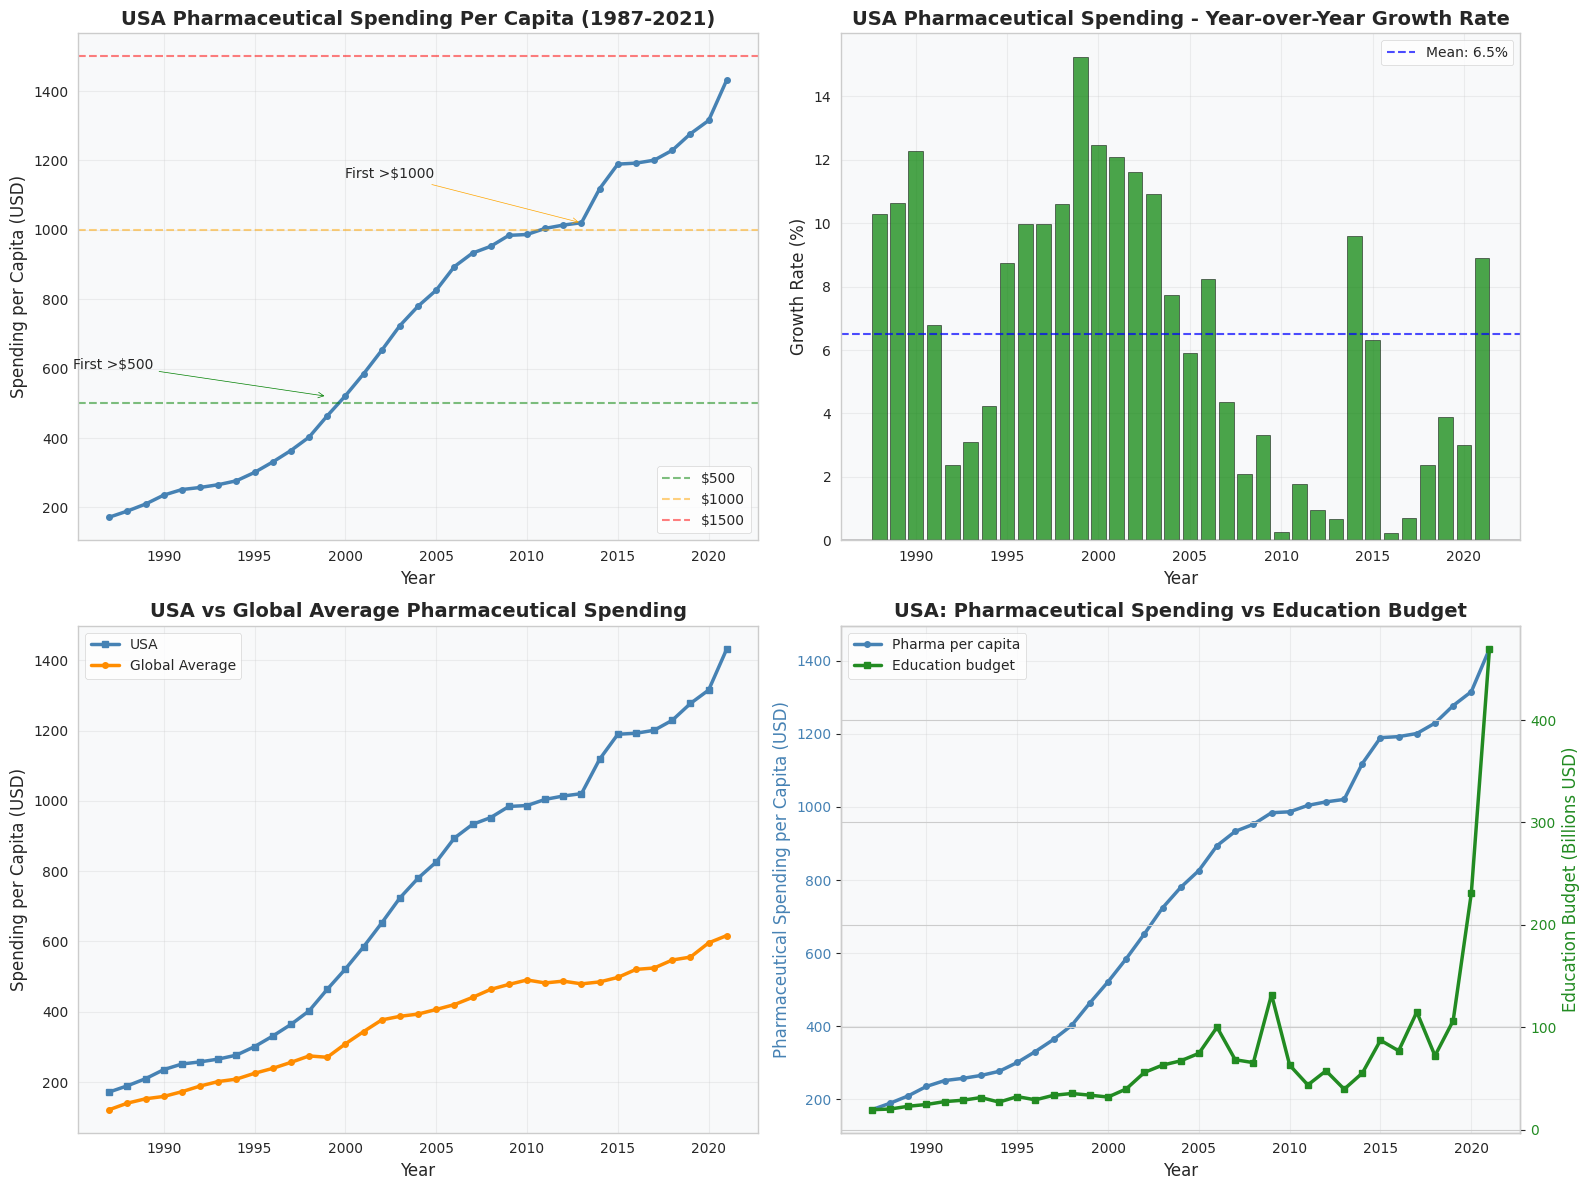

✅ Saved: usa_pharmaceutical_analysis.png

--------------------------------------------------------------------------------
🌍 DETAILED COUNTRY COMPARISONS
--------------------------------------------------------------------------------

📊 Pharmaceutical Spending Per Capita - Major Economies Comparison:
Year             1990   2000   2010    2020    2021
Country                                            
Canada         202.52 406.82 755.74  836.93  865.34
France         252.16 454.16 621.64  743.84  765.58
Germany        253.63 407.47 663.25  947.68 1042.46
Japan          233.28 340.10 648.83  835.93     NaN
United Kingdom 113.36    NaN    NaN  528.75  517.29
United States  235.47 521.68 986.63 1315.22 1432.31

📈 20-Year Growth Rates (2000-2020):
--------------------------------------------------
   United States  :  152.1% total,  4.73% annualized
   Canada         :  105.7% total,  3.67% annualized
   Germany        :  132.6% total,  4.31% annualized
   Japan          :  145.8% total,

In [21]:
# ============================================
# STEP 6: FILTER AND SORT DATA TO ANSWER QUESTIONS
# ============================================

print("="*80)
print("STEP 6: FILTER AND SORT DATA TO ANSWER QUESTIONS")
print("="*80)

# ============================================
# 6.1 FIND MOST RECENT YEAR IN PHARMACEUTICAL DATASET
# ============================================
print("\n" + "-"*80)
print("🔍 IDENTIFYING MOST RECENT YEAR")
print("-"*80)

most_recent_year = df_pharma_clean['year'].max()
print(f"📅 Most recent year with pharmaceutical spending data: {most_recent_year}")

# Check which countries have data for the most recent year
countries_recent = df_pharma_clean[df_pharma_clean['year'] == most_recent_year]['country_name'].nunique()
print(f"🌍 Countries with data in {most_recent_year}: {countries_recent}")

# Display the most recent year data
recent_pharma_data = df_pharma_clean[df_pharma_clean['year'] == most_recent_year].copy()
print(f"\n📊 First 5 rows of {most_recent_year} pharmaceutical data:")
print(recent_pharma_data[['country_name', 'pharma_spending_per_capita']].head())

# ============================================
# 6.2 QUESTION 1: HIGHEST AND LOWEST PHARMACEUTICAL SPENDING IN MOST RECENT YEAR
# ============================================
print("\n" + "-"*80)
print("🔹 QUESTION 1: Which countries had the highest and lowest pharmaceutical spending per capita in the most recent year?")
print("-"*80)

# Sort by spending per capita (descending) to get highest
highest_spending = recent_pharma_data.sort_values('pharma_spending_per_capita', ascending=False)

print(f"\n🏆 TOP 10 COUNTRIES - Highest Pharmaceutical Spending Per Capita ({most_recent_year}):")
print("="*70)
print(f"{'Rank':<6} {'Country':<25} {'Spending (USD)':>15} {'vs USA':>12} {'vs Global Avg':>15}")
print("-"*70)

usa_spending = None # Initialize
if 'United States' in highest_spending['country_name'].values:
    usa_spending = highest_spending[highest_spending['country_name'] == 'United States']['pharma_spending_per_capita'].values[0]

global_avg = recent_pharma_data['pharma_spending_per_capita'].mean()

for i, (idx, row) in enumerate(highest_spending.head(10).iterrows(), 1):
    vs_usa_str = f"{row['pharma_spending_per_capita'] / usa_spending * 100:>11.1f}%" if usa_spending is not None else f"{'N/A':>11}"
    vs_global = (row['pharma_spending_per_capita'] / global_avg * 100)
    print(f"{i:<6} {row['country_name']:<25} ${row['pharma_spending_per_capita']:>14.2f} {vs_usa_str} {vs_global:>14.1f}%")

print(f"\n🐢 BOTTOM 10 COUNTRIES - Lowest Pharmaceutical Spending Per Capita ({most_recent_year}):")
print("="*70)
print(f"{'Rank':<6} {'Country':<25} {'Spending (USD)':>15} {'vs USA':>12} {'vs Global Avg':>15}")
print("-"*70)

lowest_spending = recent_pharma_data.sort_values('pharma_spending_per_capita', ascending=True)

for i, (idx, row) in enumerate(lowest_spending.head(10).iterrows(), 1):
    vs_usa_str = f"{row['pharma_spending_per_capita'] / usa_spending * 100:>11.1f}%" if usa_spending is not None else f"{'N/A':>11}"
    vs_global = (row['pharma_spending_per_capita'] / global_avg * 100)
    print(f"{i:<6} {row['country_name']:<25} ${row['pharma_spending_per_capita']:>14.2f} {vs_usa_str} {vs_global:>14.1f}%")

# Calculate spending ratios
print(f"\n📊 KEY INSIGHTS ({most_recent_year}):")
print(f"   • USA spending: ${usa_spending:.2f}" if usa_spending is not None else "   • USA spending: N/A")
print(f"   • Global average: ${global_avg:.2f}")
print(f"   • Highest country: {highest_spending.iloc[0]['country_name']} (${highest_spending.iloc[0]['pharma_spending_per_capita']:.2f})")
print(f"   • Lowest country: {lowest_spending.iloc[0]['country_name']} (${lowest_spending.iloc[0]['pharma_spending_per_capita']:.2f})")
print(f"   • Ratio (Highest:Lowest): {highest_spending.iloc[0]['pharma_spending_per_capita'] / lowest_spending.iloc[0]['pharma_spending_per_capita']:.1f}x")
print(f"   • USA is {usa_spending / global_avg:.1f}x the global average" if usa_spending is not None else "   • USA is N/A vs global average")

# ============================================
# 6.3 DETAILED USA ANALYSIS FOR MOST RECENT YEAR
# ============================================
print("\n" + "-"*80)
print("🇺🇸 USA PHARMACEUTICAL SPENDING - DETAILED ANALYSIS")
print("-"*80)

# Get USA data for most recent year
usa_spending_recent = None # Initialize
usa_pct_health = None
usa_pct_gdp = None
usa_total = None

usa_recent = recent_pharma_data[recent_pharma_data['country_name'] == 'United States']
if len(usa_recent) > 0:
    usa_spending_recent = usa_recent.iloc[0]['pharma_spending_per_capita']
    usa_pct_health = usa_recent.iloc[0]['pharma_pct_health']
    usa_pct_gdp = usa_recent.iloc[0]['pharma_pct_gdp']
    usa_total = usa_recent.iloc[0]['total_pharma_spending']

    print(f"\n📊 USA Pharmaceutical Spending ({most_recent_year}):")
    print(f"   • Per capita spending: ${usa_spending_recent:.2f}")
    print(f"   • % of health spending: {usa_pct_health:.2f}%")
    print(f"   • % of GDP: {usa_pct_gdp:.2f}%")
    print(f"   • Total spending: ${usa_total:,.2f} million")
    print(f"   • Total spending (billions): ${usa_total/1000:.2f}B")
else:
    print(f"\n📊 USA Pharmaceutical Spending ({most_recent_year}): No data available for United States.")

# Compare USA to other developed countries
developed_countries = ['Canada', 'Germany', 'France', 'United Kingdom', 'Japan', 'Australia', 'Switzerland']
developed_data = recent_pharma_data[recent_pharma_data['country_name'].isin(developed_countries)].copy()

print(f"\n🌍 USA vs Other Developed Countries ({most_recent_year}):")
print("="*70)
print(f"{'Country':<20} {'Spending (USD)':>15} {'vs USA':>12} {'Rank':>8}")
print("-"*70)

developed_sorted = developed_data.sort_values('pharma_spending_per_capita', ascending=False)
for idx, row in developed_sorted.iterrows():
    vs_usa_str = f"{row['pharma_spending_per_capita'] / usa_spending_recent * 100:>11.1f}%" if usa_spending_recent is not None and usa_spending_recent != 0 else f"{'N/A':>11}"
    rank = developed_sorted.index.get_loc(idx) + 1
    print(f"{row['country_name']:<20} ${row['pharma_spending_per_capita']:>14.2f} {vs_usa_str} {rank:>8}")

# ============================================
# 6.4 QUESTION 2: USA PHARMACEUTICAL SPENDING OVER TIME
# ============================================
print("\n" + "-"*80)
print("🔹 QUESTION 2: For the USA, analyze pharmaceutical spending per capita over time")
print("-"*80)

# Sort USA data chronologically
df_usa_pharma_sorted = df_usa_pharma.sort_values('year')

print("\n📈 USA Pharmaceutical Spending Per Capita - Time Series (1987-2021):")
print("="*80)
print(f"{'Year':<6} {'Spending':>12} {'YoY $ Change':>15} {'YoY % Change':>15} {'10-Year Change':>18}")
print("-"*80)

for i, (idx, row) in enumerate(df_usa_pharma_sorted.iterrows()):
    year = row['year']
    spending = row['pharma_spending_per_capita']
    yoy_change = row['yoy_growth_abs'] if 'yoy_growth_abs' in row else 0
    yoy_pct = row['yoy_growth'] if 'yoy_growth' in row else 0

    # Calculate 10-year change
    ten_year_change = ""
    if i >= 10:
        prev_year = df_usa_pharma_sorted.iloc[i-10]['year']
        prev_spending = df_usa_pharma_sorted.iloc[i-10]['pharma_spending_per_capita']
        ten_year_pct = ((spending / prev_spending) - 1) * 100
        ten_year_change = f"{prev_year}-{year}: {ten_year_pct:>5.1f}%"

    print(f"{year:<6} ${spending:>11.2f} ${yoy_change:>14.2f} {yoy_pct:>14.2f}% {ten_year_change:>18}")

# Calculate key milestones
print("\n🏁 KEY MILESTONES IN USA PHARMACEUTICAL SPENDING:")
print("-"*50)

# First year over $500
year_500 = df_usa_pharma_sorted[df_usa_pharma_sorted['pharma_spending_per_capita'] >= 500].iloc[0]['year'] if len(df_usa_pharma_sorted[df_usa_pharma_sorted['pharma_spending_per_capita'] >= 500]) > 0 else "N/A"
print(f"   • First exceeded $500: {year_500}")

# First year over $1000
year_1000 = df_usa_pharma_sorted[df_usa_pharma_sorted['pharma_spending_per_capita'] >= 1000].iloc[0]['year'] if len(df_usa_pharma_sorted[df_usa_pharma_sorted['pharma_spending_per_capita'] >= 1000]) > 0 else "N/A"
print(f"   • First exceeded $1,000: {year_1000}")

# Fastest growth period
max_growth_year = df_usa_pharma_sorted.loc[df_usa_pharma_sorted['yoy_growth'].idxmax(), 'year'] if 'yoy_growth' in df_usa_pharma_sorted.columns else "N/A"
max_growth_rate = df_usa_pharma_sorted['yoy_growth'].max() if 'yoy_growth' in df_usa_pharma_sorted.columns else 0
print(f"   • Fastest annual growth: {max_growth_rate:.1f}% ({max_growth_year})")

# Total growth
first_year = df_usa_pharma_sorted.iloc[0]['year']
first_spending = df_usa_pharma_sorted.iloc[0]['pharma_spending_per_capita']
last_year = df_usa_pharma_sorted.iloc[-1]['year']
last_spending = df_usa_pharma_sorted.iloc[-1]['pharma_spending_per_capita']
total_growth = ((last_spending / first_spending) - 1) * 100
annualized_growth = ( (last_spending / first_spending) ** (1/(last_year - first_year)) - 1 ) * 100

print(f"\n📊 TOTAL GROWTH ({first_year}-{last_year}):")
print(f"   • {first_year}: ${first_spending:.2f}")
print(f"   • {last_year}: ${last_spending:.2f}")
print(f"   • Absolute growth: ${last_spending - first_spending:.2f}")
print(f"   • Total percentage growth: {total_growth:.1f}%")
print(f"   • Annualized growth rate: {annualized_growth:.2f}%")

# ============================================
# 6.5 CREATE USA PHARMACEUTICAL SPENDING PLOT
# ============================================
print("\n" + "-"*80)
print("📊 CREATING USA PHARMACEUTICAL SPENDING OVER TIME PLOT")
print("-"*80)

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: USA Pharmaceutical Spending Over Time
ax1 = axes[0, 0]
ax1.plot(df_usa_pharma_sorted['year'], df_usa_pharma_sorted['pharma_spending_per_capita'],
         marker='o', linewidth=2.5, color='steelblue', markersize=4)
ax1.set_title('USA Pharmaceutical Spending Per Capita (1987-2021)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Spending per Capita (USD)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=500, color='green', linestyle='--', alpha=0.5, label='$500')
ax1.axhline(y=1000, color='orange', linestyle='--', alpha=0.5, label='$1000')
ax1.axhline(y=1500, color='red', linestyle='--', alpha=0.5, label='$1500')
ax1.legend()
ax1.set_facecolor('#f8f9fa')

# Add annotations for key events
ax1.annotate('First >$500', xy=(1999, 520), xytext=(1985, 600),
             arrowprops=dict(arrowstyle='->', color='green'), fontsize=10)
ax1.annotate('First >$1000', xy=(2013, 1020), xytext=(2000, 1150),
             arrowprops=dict(arrowstyle='->', color='orange'), fontsize=10)

# Plot 2: Year-over-Year Growth Rate
ax2 = axes[0, 1]
years = df_usa_pharma_sorted['year'][1:]  # Skip first year (no growth)
growth_rates = df_usa_pharma_sorted['yoy_growth'][1:]

colors = ['green' if x > 0 else 'red' for x in growth_rates]
ax2.bar(years, growth_rates, color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
ax2.set_title('USA Pharmaceutical Spending - Year-over-Year Growth Rate', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Growth Rate (%)', fontsize=12)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.axhline(y=growth_rates.mean(), color='blue', linestyle='--', alpha=0.7, label=f'Mean: {growth_rates.mean():.1f}%')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_facecolor('#f8f9fa')

# Plot 3: USA vs Global Average
ax3 = axes[1, 0]

# Get global average by year
global_avg_by_year = df_pharma_clean.groupby('year')['pharma_spending_per_capita'].mean().reset_index()
global_avg_by_year = global_avg_by_year[global_avg_by_year['year'].between(1987, 2021)]

ax3.plot(df_usa_pharma_sorted['year'], df_usa_pharma_sorted['pharma_spending_per_capita'],
         marker='s', linewidth=2.5, color='steelblue', label='USA', markersize=4)
ax3.plot(global_avg_by_year['year'], global_avg_by_year['pharma_spending_per_capita'],
         marker='o', linewidth=2.5, color='darkorange', label='Global Average', markersize=4)
ax3.set_title('USA vs Global Average Pharmaceutical Spending', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Spending per Capita (USD)', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_facecolor('#f8f9fa')

# Plot 4: USA Pharmaceutical Spending vs Education Budget
ax4 = axes[1, 1]

if len(df_merged_final) > 0:
    ax4_twin = ax4.twinx()

    # Plot pharma spending on left axis
    line1 = ax4.plot(df_merged_final['year'], df_merged_final['usa_pharma_per_capita'],
                     marker='o', linewidth=2.5, color='steelblue', label='Pharma per capita', markersize=4)
    ax4.set_xlabel('Year', fontsize=12)
    ax4.set_ylabel('Pharmaceutical Spending per Capita (USD)', fontsize=12, color='steelblue')
    ax4.tick_params(axis='y', labelcolor='steelblue')

    # Plot education budget on right axis
    line2 = ax4_twin.plot(df_merged_final['year'], df_merged_final['edu_budget_billions'],
                          marker='s', linewidth=2.5, color='forestgreen', label='Education budget', markersize=4)
    ax4_twin.set_ylabel('Education Budget (Billions USD)', fontsize=12, color='forestgreen')
    ax4_twin.tick_params(axis='y', labelcolor='forestgreen')

    # Add legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax4.legend(lines, labels, loc='upper left')

    ax4.set_title('USA: Pharmaceutical Spending vs Education Budget', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.set_facecolor('#f8f9fa')
else:
    ax4.text(0.5, 0.5, 'No merged data available',
             horizontalalignment='center', verticalalignment='center',
             transform=ax4.transAxes, fontsize=14)
    ax4.set_title('USA: Pharmaceutical Spending vs Education Budget', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('usa_pharmaceutical_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: usa_pharmaceutical_analysis.png")

# ============================================
# 6.6 DETAILED COUNTRY COMPARISONS
# ============================================
print("\n" + "-"*80)
print("🌍 DETAILED COUNTRY COMPARISONS")
print("-"*80)

# Compare USA with other major economies over time
comparison_countries = ['United States', 'Canada', 'Germany', 'Japan', 'United Kingdom', 'France']
comparison_data = df_pharma_clean[df_pharma_clean['country_name'].isin(comparison_countries)]

# Get data for key years
key_years = [1990, 2000, 2010, 2020, 2021]
comparison_summary = []

for year in key_years:
    year_data = comparison_data[comparison_data['year'] == year]
    if len(year_data) > 0:
        for country in comparison_countries:
            country_data = year_data[year_data['country_name'] == country]
            if len(country_data) > 0:
                comparison_summary.append({
                    'Year': year,
                    'Country': country,
                    'Spending': country_data.iloc[0]['pharma_spending_per_capita']
                })

comparison_df = pd.DataFrame(comparison_summary)
comparison_pivot = comparison_df.pivot(index='Country', columns='Year', values='Spending').round(2)

print("\n📊 Pharmaceutical Spending Per Capita - Major Economies Comparison:")
print("="*80)
print(comparison_pivot.to_string())

# Calculate growth rates for each country
print("\n📈 20-Year Growth Rates (2000-2020):")
print("-"*50)

for country in comparison_countries:
    spending_2000 = comparison_pivot.loc[country, 2000] if 2000 in comparison_pivot.columns else None
    spending_2020 = comparison_pivot.loc[country, 2020] if 2020 in comparison_pivot.columns else None

    if spending_2000 and spending_2020:
        growth = ((spending_2020 / spending_2000) - 1) * 100
        annualized = ((spending_2020 / spending_2000) ** (1/20) - 1) * 100
        print(f"   {country:<15}: {growth:>6.1f}% total, {annualized:>5.2f}% annualized")

# ============================================
# 6.7 EDUCATION BUDGET FILTERING AND SORTING
# ============================================
print("\n" + "-"*80)
print("🎓 DEPARTMENT OF EDUCATION BUDGET - FILTERING AND SORTING")
print("-"*80)

# Sort education budget by amount
edu_sorted = df_edu_only.sort_values('budget_billions', ascending=False)

print("\n🏆 TOP 10 YEARS - Highest Education Budget (Billions USD):")
print("="*60)
print(f"{'Rank':<6} {'Year':<8} {'Budget (B USD)':>18} {'Inflation Adj (B USD)':>25}")
print("-"*60)

for i, (idx, row) in enumerate(edu_sorted.head(10).iterrows(), 1):
    print(f"{i:<6} {row['year']:<8} ${row['budget_billions']:>17.2f} ${row['budget_2020_dollars']/1000:>24.2f}")

print("\n🐢 BOTTOM 10 YEARS - Lowest Education Budget (Billions USD):")
print("="*60)
print(f"{'Rank':<6} {'Year':<8} {'Budget (B USD)':>18} {'Inflation Adj (B USD)':>25}")
print("-"*60)

edu_lowest = df_edu_only.sort_values('budget_billions', ascending=True)
for i, (idx, row) in enumerate(edu_lowest.head(10).iterrows(), 1):
    print(f"{i:<6} {row['year']:<8} ${row['budget_billions']:>17.2f} ${row['budget_2020_dollars']/1000:>24.2f}")

# Budget trends by decade
print("\n📊 Education Budget Trends by Decade (Billions USD):")
print("="*60)

edu_decade = df_edu_only.groupby('decade')['budget_billions'].agg(['mean', 'min', 'max', 'count']).round(2)
print(edu_decade.to_string())

# Recent budget trends (last 10 years)
recent_edu = df_edu_only[df_edu_only['year'] >= 2015].sort_values('year')
print("\n📈 Recent Education Budget Trends (2015-2024):")
print("-"*50)

for idx, row in recent_edu.iterrows():
    print(f"   {row['year']}: ${row['budget_billions']:.2f}B")

# ============================================
# 6.8 ANSWER SPECIFIC QUESTIONS - SUMMARY
# ============================================
print("\n" + "-"*80)
print("📋 ANSWERING FILTER AND SORT QUESTIONS - SUMMARY")
print("-"*80)

print("\n🔹 QUESTION 1: Highest and lowest pharmaceutical spending per capita in the most recent year")
print("-"*60)
print(f"   📅 Most recent year: {most_recent_year}")
print(f"   🥇 Highest: {highest_spending.iloc[0]['country_name']} (${highest_spending.iloc[0]['pharma_spending_per_capita']:.2f})")
print(f"   🥈 Second highest: {highest_spending.iloc[1]['country_name']} (${highest_spending.iloc[1]['pharma_spending_per_capita']:.2f})")
print(f"   🥉 Third highest: {highest_spending.iloc[2]['country_name']} (${highest_spending.iloc[2]['pharma_spending_per_capita']:.2f})")
print(f"   🐢 Lowest: {lowest_spending.iloc[0]['country_name']} (${lowest_spending.iloc[0]['pharma_spending_per_capita']:.2f})")
print(f"   📊 USA rank: {highest_spending[highest_spending['country_name'] == 'United States'].index[0] + 1}" if 'United States' in highest_spending['country_name'].values else "   📊 USA rank: N/A")

print("\n🔹 QUESTION 2: USA pharmaceutical spending per capita over time")
print("-"*60)
print(f"   📈 USA spending grew from ${first_spending:.2f} ({first_year}) to ${last_spending:.2f} ({last_year})")
print(f"   📊 Total growth: {total_growth:.1f}% over {last_year - first_year} years")
print(f"   📉 Annualized growth rate: {annualized_growth:.2f}%")
print(f"   📊 Year with highest spending: {df_usa_pharma_sorted.loc[df_usa_pharma_sorted['pharma_spending_per_capita'].idxmax(), 'year']} (${df_usa_pharma_sorted['pharma_spending_per_capita'].max():.2f})")
print(f"   📊 Year with lowest spending: {df_usa_pharma_sorted.loc[df_usa_pharma_sorted['pharma_spending_per_capita'].idxmin(), 'year']} (${df_usa_pharma_sorted['pharma_spending_per_capita'].min():.2f})")
print(f"   📊 Fastest growth: {max_growth_year} ({max_growth_rate:.1f}%)")

print("\n🔹 ADDITIONAL INSIGHTS:")
print("-"*60)
print(f"   • USA spends {usa_spending_recent / global_avg:.1f}x the global average on pharmaceuticals" if usa_spending_recent is not None else "   • USA spends N/A vs the global average on pharmaceuticals")
print(f"   • USA spends {usa_spending_recent / developed_sorted.iloc[1]['pharma_spending_per_capita']:.2f}x more than #2 ranked developed country" if usa_spending_recent is not None and len(developed_sorted) > 1 else "   • USA vs #2 developed country comparison: N/A")
print(f"   • Department of Education budget peaked at ${edu_sorted.iloc[0]['budget_billions']:.2f}B ({edu_sorted.iloc[0]['year']})")
print(f"   • Department of Education budget lowest at ${edu_lowest.iloc[0]['budget_billions']:.2f}B ({edu_lowest.iloc[0]['year']})")

# ============================================
# 6.9 EXPORT FILTERED AND SORTED DATA
# ============================================
print("\n" + "-"*80)
print("💾 EXPORTING FILTERED AND SORTED DATA")
print("-"*80)

# Export most recent year pharmaceutical data
recent_pharma_data.to_csv(f'pharmaceutical_spending_{most_recent_year}.csv', index=False)
print(f"✅ Saved: pharmaceutical_spending_{most_recent_year}.csv")

# Export USA pharmaceutical time series
df_usa_pharma_sorted.to_csv('usa_pharmaceutical_time_series.csv', index=False)
print("✅ Saved: usa_pharmaceutical_time_series.csv")

# Export highest spending countries
highest_spending.head(20).to_csv('top_20_pharma_spending_countries.csv', index=False)
print("✅ Saved: top_20_pharma_spending_countries.csv")

# Export lowest spending countries
lowest_spending.head(20).to_csv('bottom_20_pharma_spending_countries.csv', index=False)
print("✅ Saved: bottom_20_pharma_spending_countries.csv")

# Export education budget sorted
edu_sorted.to_csv('education_budget_sorted.csv', index=False)
print("✅ Saved: education_budget_sorted.csv")

# Export country comparison data
comparison_pivot.to_csv('major_economies_pharma_comparison.csv')
print("✅ Saved: major_economies_pharma_comparison.csv")


STEP 7: GROUP AND AGGREGATE

--------------------------------------------------------------------------------
🔍 IDENTIFYING LAST 10 YEARS OF PHARMACEUTICAL DATA
--------------------------------------------------------------------------------
📅 Most recent year: 2022
📅 Last 10 years: 2013 to 2022
📅 Years included: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

✅ Filtered pharmaceutical data for last 10 years:
   • Rows: 366
   • Countries: 42
   • Years: 2013 to 2022

📊 Countries with complete 10-year data: 7
📊 Countries with incomplete data: 35

   Countries with incomplete data:
   • Australia: 8 years
   • Austria: 9 years
   • Belgium: 9 years
   • Brazil: 5 years
   • Bulgaria: 9 years
   • Chile: 3 years
   • Colombia: 5 years
   • Costa Rica: 9 years
   • Croatia: 9 years
   • Cyprus: 9 years
   • ... and 25 more

--------------------------------------------------------------------------------
🔹 QUESTION 3: Group by country and calculate average pharmaceutical spen

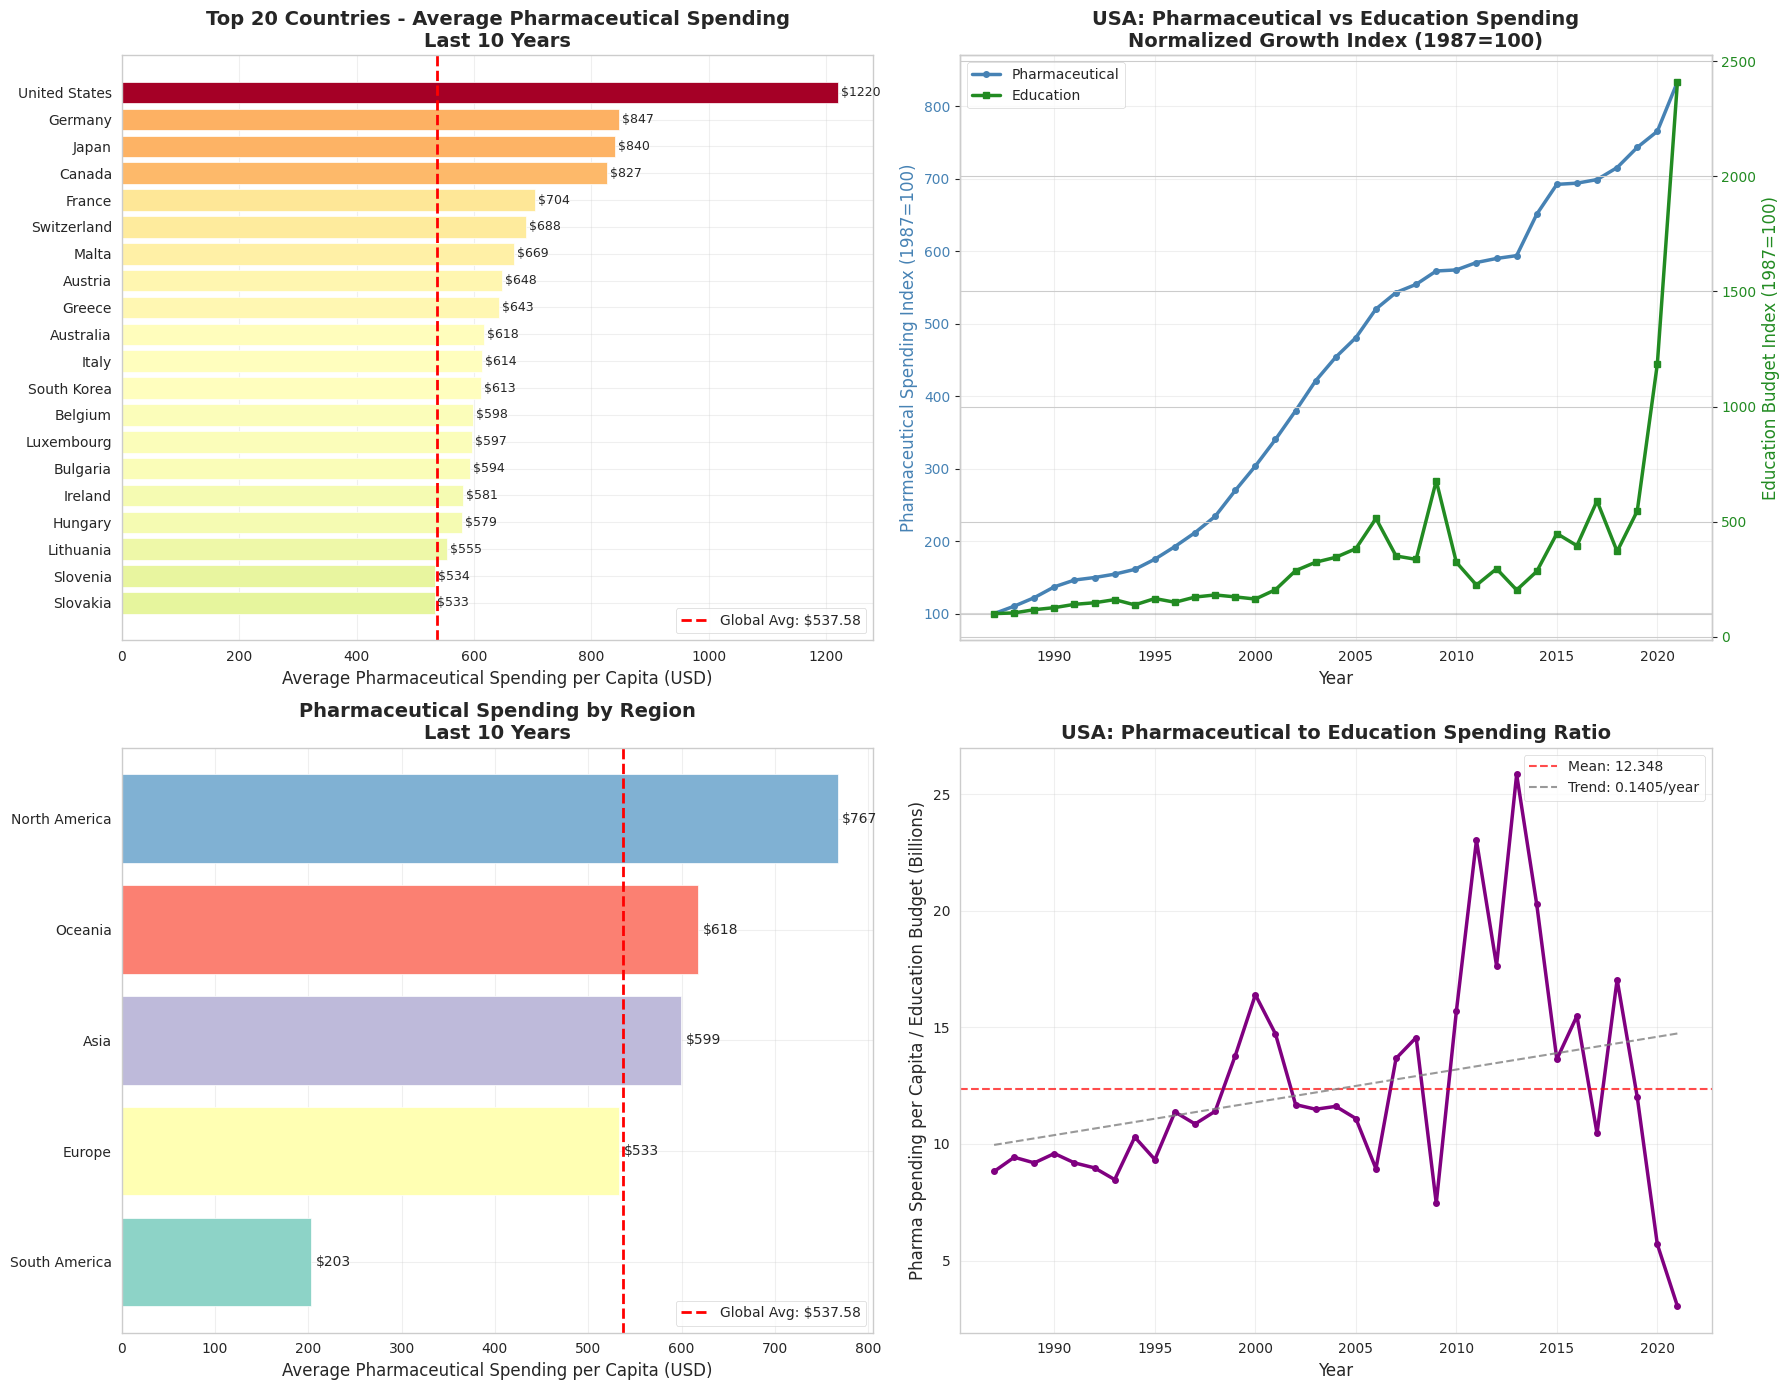

✅ Saved: group_aggregate_analysis.png

--------------------------------------------------------------------------------
💾 EXPORTING GROUP AND AGGREGATE RESULTS
--------------------------------------------------------------------------------
✅ Saved: pharmaceutical_spending_last_10_years.csv
✅ Saved: pharmaceutical_decade_comparison.csv
✅ Saved: regional_pharmaceutical_stats_last_10_years.csv
✅ Saved: education_budget_by_decade.csv
✅ Saved: usa_pharma_education_complete_comparison.csv
✅ Saved: regional_growth_comparison.csv

--------------------------------------------------------------------------------
📋 GROUP AND AGGREGATE - SUMMARY OF FINDINGS
--------------------------------------------------------------------------------

🔹 QUESTION 3: Average pharmaceutical spending per capita for the last 10 years by country
----------------------------------------------------------------------
   • Total countries analyzed: 42
   • Global average (last 10 years): $537.58
   • Highest average: U

In [22]:
# ============================================
# STEP 7: GROUP AND AGGREGATE
# ============================================

print("="*80)
print("STEP 7: GROUP AND AGGREGATE")
print("="*80)

# ============================================
# 7.1 IDENTIFY LAST 10 YEARS OF PHARMACEUTICAL DATA
# ============================================
print("\n" + "-"*80)
print("🔍 IDENTIFYING LAST 10 YEARS OF PHARMACEUTICAL DATA")
print("-"*80)

# Get the most recent year and calculate last 10 years
most_recent_year = df_pharma_clean['year'].max()
last_10_years_start = most_recent_year - 9
last_10_years_range = list(range(last_10_years_start, most_recent_year + 1))

print(f"📅 Most recent year: {most_recent_year}")
print(f"📅 Last 10 years: {last_10_years_start} to {most_recent_year}")
print(f"📅 Years included: {last_10_years_range}")

# Filter pharmaceutical data for last 10 years
df_pharma_last_10 = df_pharma_clean[df_pharma_clean['year'].isin(last_10_years_range)].copy()
print(f"\n✅ Filtered pharmaceutical data for last 10 years:")
print(f"   • Rows: {len(df_pharma_last_10):,}")
print(f"   • Countries: {df_pharma_last_10['country_name'].nunique()}")
print(f"   • Years: {df_pharma_last_10['year'].min()} to {df_pharma_last_10['year'].max()}")

# Check which countries have complete 10-year data
country_year_counts = df_pharma_last_10.groupby('country_name')['year'].nunique()
countries_complete = country_year_counts[country_year_counts >= 10].index.tolist()
countries_incomplete = country_year_counts[country_year_counts < 10].index.tolist()

print(f"\n📊 Countries with complete 10-year data: {len(countries_complete)}")
print(f"📊 Countries with incomplete data: {len(countries_incomplete)}")

if len(countries_incomplete) > 0:
    print("\n   Countries with incomplete data:")
    for country in countries_incomplete[:10]:  # Show first 10
        years_count = country_year_counts[country]
        print(f"   • {country}: {years_count} years")
    if len(countries_incomplete) > 10:
        print(f"   • ... and {len(countries_incomplete) - 10} more")

# ============================================
# 7.2 QUESTION 3: AVERAGE PHARMACEUTICAL SPENDING FOR LAST 10 YEARS BY COUNTRY
# ============================================
print("\n" + "-"*80)
print("🔹 QUESTION 3: Group by country and calculate average pharmaceutical spending per capita for the last 10 years")
print("-"*80)

# Calculate average spending for last 10 years by country
pharma_avg_last_10 = df_pharma_last_10.groupby('country_name').agg({
    'pharma_spending_per_capita': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'year': ['min', 'max']
}).round(2)

# Flatten column names
pharma_avg_last_10.columns = ['avg_spending', 'median_spending', 'std_dev', 'min_spending', 'max_spending',
                              'years_of_data', 'first_year', 'last_year']
pharma_avg_last_10 = pharma_avg_last_10.sort_values('avg_spending', ascending=False)

print("\n🏆 TOP 20 COUNTRIES - Average Pharmaceutical Spending Per Capita (Last 10 Years):")
print("="*90)
print(f"{'Rank':<6} {'Country':<25} {'Avg Spending':>15} {'Median':>12} {'Min':>12} {'Max':>12} {'Years':>8}")
print("-"*90)

for i, (country, row) in enumerate(pharma_avg_last_10.head(20).iterrows(), 1):
    print(f"{i:<6} {country:<25} ${row['avg_spending']:>14.2f} ${row['median_spending']:>11.2f} ${row['min_spending']:>11.2f} ${row['max_spending']:>11.2f} {row['years_of_data']:>8.0f}")

print("\n🐢 BOTTOM 20 COUNTRIES - Average Pharmaceutical Spending Per Capita (Last 10 Years):")
print("="*90)
print(f"{'Rank':<6} {'Country':<25} {'Avg Spending':>15} {'Median':>12} {'Min':>12} {'Max':>12} {'Years':>8}")
print("-"*90)

bottom_20 = pharma_avg_last_10.tail(20)
for i, (country, row) in enumerate(bottom_20.iterrows(), 1):
    print(f"{i:<6} {country:<25} ${row['avg_spending']:>14.2f} ${row['median_spending']:>11.2f} ${row['min_spending']:>11.2f} ${row['max_spending']:>11.2f} {row['years_of_data']:>8.0f}")

# Calculate global average for last 10 years
global_avg_last_10 = df_pharma_last_10['pharma_spending_per_capita'].mean()
global_median_last_10 = df_pharma_last_10['pharma_spending_per_capita'].median()

print(f"\n🌍 GLOBAL AVERAGE (Last 10 Years):")
print(f"   • Mean: ${global_avg_last_10:.2f}")
print(f"   • Median: ${global_median_last_10:.2f}")
print(f"   • Countries included: {df_pharma_last_10['country_name'].nunique()}")
print(f"   • Total observations: {len(df_pharma_last_10):,}")

# USA ranking in last 10 years
if 'United States' in pharma_avg_last_10.index:
    usa_rank = pharma_avg_last_10.index.get_loc('United States') + 1
    usa_avg = pharma_avg_last_10.loc['United States', 'avg_spending']
    print(f"\n🇺🇸 USA RANKING (Last 10 Years):")
    print(f"   • Rank: #{usa_rank} out of {len(pharma_avg_last_10)} countries")
    print(f"   • Average spending: ${usa_avg:.2f}")
    print(f"   • vs Global average: {usa_avg / global_avg_last_10:.1f}x higher")

# ============================================
# 7.3 TREND ANALYSIS - LAST 10 YEARS VS PREVIOUS DECADE
# ============================================
print("\n" + "-"*80)
print("📊 TREND ANALYSIS: Last 10 Years vs Previous Decade")
print("-"*80)

# Get previous decade data (10 years before last 10 years)
previous_decade_start = last_10_years_start - 10
previous_decade_end = last_10_years_start - 1
previous_decade_range = list(range(previous_decade_start, previous_decade_end + 1))

df_pharma_previous = df_pharma_clean[df_pharma_clean['year'].isin(previous_decade_range)].copy()

print(f"📅 Previous decade: {previous_decade_start} to {previous_decade_end}")
print(f"📅 Current decade: {last_10_years_start} to {most_recent_year}")

# Calculate average for both periods by country
avg_previous = df_pharma_previous.groupby('country_name')['pharma_spending_per_capita'].mean().round(2)
avg_current = df_pharma_last_10.groupby('country_name')['pharma_spending_per_capita'].mean().round(2)

# Create comparison dataframe
comparison_decade = pd.DataFrame({
    'previous_decade_avg': avg_previous,
    'current_decade_avg': avg_current
}).dropna()

comparison_decade['change'] = comparison_decade['current_decade_avg'] - comparison_decade['previous_decade_avg']
comparison_decade['pct_change'] = (comparison_decade['change'] / comparison_decade['previous_decade_avg'] * 100).round(1)
comparison_decade = comparison_decade.sort_values('pct_change', ascending=False)

print("\n📈 TOP 10 COUNTRIES - Highest Growth (Previous Decade vs Last 10 Years):")
print("="*80)
print(f"{'Country':<25} {'Previous Avg':>15} {'Current Avg':>15} {'Change':>15} {'% Change':>12}")
print("-"*80)

for country, row in comparison_decade.head(10).iterrows():
    print(f"{country:<25} ${row['previous_decade_avg']:>14.2f} ${row['current_decade_avg']:>14.2f} ${row['change']:>14.2f} {row['pct_change']:>11.1f}%")

print("\n📉 BOTTOM 10 COUNTRIES - Lowest Growth / Decline:")
print("="*80)
print(f"{'Country':<25} {'Previous Avg':>15} {'Current Avg':>15} {'Change':>15} {'% Change':>12}")
print("-"*80)

for country, row in comparison_decade.tail(10).iterrows():
    print(f"{country:<25} ${row['previous_decade_avg']:>14.2f} ${row['current_decade_avg']:>14.2f} ${row['change']:>14.2f} {row['pct_change']:>11.1f}%")

# USA comparison
if 'United States' in comparison_decade.index:
    usa_previous = comparison_decade.loc['United States', 'previous_decade_avg']
    usa_current = comparison_decade.loc['United States', 'current_decade_avg']
    usa_pct = comparison_decade.loc['United States', 'pct_change']
    print(f"\n🇺🇸 USA: ${usa_previous:.2f} → ${usa_current:.2f} ({usa_pct:+.1f}%)")

# ============================================
# 7.4 QUESTION 4: COMPARE EDUCATION AND HEALTH SPENDING FOR USA
# ============================================
print("\n" + "-"*80)
print("🔹 QUESTION 4: Compare trends between education and health spending for the USA")
print("-"*80)

# Ensure we have merged data
if len(df_merged_final) > 0:
    print("✅ Using merged USA pharmaceutical and education budget dataset")
    print(f"📊 Analysis period: {df_merged_final['year'].min()} to {df_merged_final['year'].max()} ({len(df_merged_final)} years)")

    # ============================================
    # 7.4.1 Overall Statistics Comparison
    # ============================================
    print("\n📊 OVERALL STATISTICS COMPARISON:")
    print("="*70)

    pharma_mean = df_merged_final['usa_pharma_per_capita'].mean()
    pharma_median = df_merged_final['usa_pharma_per_capita'].median()
    pharma_total_growth = ((df_merged_final['usa_pharma_per_capita'].iloc[-1] / df_merged_final['usa_pharma_per_capita'].iloc[0]) - 1) * 100

    edu_mean = df_merged_final['edu_budget_billions'].mean()
    edu_median = df_merged_final['edu_budget_billions'].median()
    edu_total_growth = ((df_merged_final['edu_budget_billions'].iloc[-1] / df_merged_final['edu_budget_billions'].iloc[0]) - 1) * 100

    comparison_stats = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Total Growth (%)', 'First Year Value', 'Last Year Value'],
        'Pharmaceutical (USD per capita)': [
            f'${pharma_mean:.2f}',
            f'${pharma_median:.2f}',
            f'{pharma_total_growth:.1f}%',
            f'${df_merged_final["usa_pharma_per_capita"].iloc[0]:.2f}',
            f'${df_merged_final["usa_pharma_per_capita"].iloc[-1]:.2f}'
        ],
        'Education (Billions USD)': [
            f'${edu_mean:.2f}B',
            f'${edu_median:.2f}B',
            f'{edu_total_growth:.1f}%',
            f'${df_merged_final["edu_budget_billions"].iloc[0]:.2f}B',
            f'${df_merged_final["edu_budget_billions"].iloc[-1]:.2f}B'
        ]
    })

    print(comparison_stats.to_string(index=False))

    # ============================================
    # 7.4.2 Year-by-Year Comparison
    # ============================================
    print("\n📈 YEAR-BY-YEAR COMPARISON:")
    print("="*90)
    print(f"{'Year':<6} {'Pharma per capita':>20} {'YoY %':>10} {'Education Budget':>20} {'YoY %':>10} {'Ratio':>12}")
    print("-"*90)

    df_merged_final = df_merged_final.sort_values('year')
    df_merged_final['pharma_yoy'] = df_merged_final['usa_pharma_per_capita'].pct_change() * 100
    df_merged_final['edu_yoy'] = df_merged_final['edu_budget_billions'].pct_change() * 100
    df_merged_final['pharma_to_edu_ratio'] = df_merged_final['usa_pharma_per_capita'] / df_merged_final['edu_budget_billions']

    for idx, row in df_merged_final.iterrows():
        pharma_yoy = row['pharma_yoy'] if not pd.isna(row['pharma_yoy']) else 0
        edu_yoy = row['edu_yoy'] if not pd.isna(row['edu_yoy']) else 0
        print(f"{row['year']:<6} ${row['usa_pharma_per_capita']:>18.2f} {pharma_yoy:>9.1f}%  ${row['edu_budget_billions']:>18.2f}B {edu_yoy:>9.1f}%  {row['pharma_to_edu_ratio']:>11.3f}")

    # ============================================
    # 7.4.3 Correlation Analysis
    # ============================================
    print("\n📊 CORRELATION ANALYSIS:")
    print("="*70)

    correlation = df_merged_final['usa_pharma_per_capita'].corr(df_merged_final['edu_budget_billions'])
    print(f"📈 Pearson correlation coefficient: {correlation:.4f}")

    if correlation > 0.8:
        strength = "Very Strong"
    elif correlation > 0.6:
        strength = "Strong"
    elif correlation > 0.4:
        strength = "Moderate"
    elif correlation > 0.2:
        strength = "Weak"
    else:
        strength = "Very Weak"

    direction = "positive" if correlation > 0 else "negative"
    print(f"📊 Interpretation: {strength} {direction} correlation")

    # Calculate R-squared
    r_squared = correlation ** 2
    print(f"📐 R-squared: {r_squared:.4f} ({r_squared*100:.1f}% of variance explained)")

    # ============================================
    # 7.4.4 Decade Comparison
    # ============================================
    print("\n📊 DECADE COMPARISON:")
    print("="*70)

    df_merged_final['decade'] = (df_merged_final['year'] // 10) * 10
    decade_comparison = df_merged_final.groupby('decade').agg({
        'usa_pharma_per_capita': ['mean', 'min', 'max'],
        'edu_budget_billions': ['mean', 'min', 'max'],
        'pharma_to_edu_ratio': 'mean'
    }).round(2)

    decade_comparison.columns = ['pharma_mean', 'pharma_min', 'pharma_max',
                                 'edu_mean', 'edu_min', 'edu_max',
                                 'ratio_mean']

    print(decade_comparison.to_string())

    # ============================================
    # 7.4.5 Growth Rate Comparison
    # ============================================
    print("\n📈 GROWTH RATE COMPARISON:")
    print("="*70)

    # Calculate compound annual growth rates (CAGR)
    years = len(df_merged_final) - 1
    pharma_cagr = ((df_merged_final['usa_pharma_per_capita'].iloc[-1] / df_merged_final['usa_pharma_per_capita'].iloc[0]) ** (1/years) - 1) * 100
    edu_cagr = ((df_merged_final['edu_budget_billions'].iloc[-1] / df_merged_final['edu_budget_billions'].iloc[0]) ** (1/years) - 1) * 100

    print(f"📊 Compound Annual Growth Rate (CAGR):")
    print(f"   • Pharmaceutical spending: {pharma_cagr:.2f}% per year")
    print(f"   • Education budget: {edu_cagr:.2f}% per year")
    print(f"   • Difference: {pharma_cagr - edu_cagr:+.2f} percentage points")

    # Calculate which grew faster in each year
    df_merged_final['pharma_grew_faster'] = df_merged_final['pharma_yoy'] > df_merged_final['edu_yoy']
    years_pharma_faster = df_merged_final['pharma_grew_faster'].sum()
    years_edu_faster = len(df_merged_final) - 1 - years_pharma_faster

    print(f"\n📊 Year-over-Year Growth Comparison:")
    print(f"   • Pharmaceutical grew faster in {years_pharma_faster} years ({years_pharma_faster/years*100:.1f}%)")
    print(f"   • Education grew faster in {years_edu_faster} years ({years_edu_faster/years*100:.1f}%)")

    # ============================================
    # 7.4.6 Spending Ratio Analysis
    # ============================================
    print("\n📊 PHARMACEUTICAL TO EDUCATION SPENDING RATIO:")
    print("="*70)

    print(f"   • Mean ratio: {df_merged_final['pharma_to_edu_ratio'].mean():.3f}")
    print(f"   • Median ratio: {df_merged_final['pharma_to_edu_ratio'].median():.3f}")
    print(f"   • Minimum ratio: {df_merged_final['pharma_to_edu_ratio'].min():.3f} ({df_merged_final.loc[df_merged_final['pharma_to_edu_ratio'].idxmin(), 'year']})")
    print(f"   • Maximum ratio: {df_merged_final['pharma_to_edu_ratio'].max():.3f} ({df_merged_final.loc[df_merged_final['pharma_to_edu_ratio'].idxmax(), 'year']})")
    print(f"   • Current ratio: {df_merged_final['pharma_to_edu_ratio'].iloc[-1]:.3f}")

    # Interpretation
    print(f"\n📌 INTERPRETATION:")
    print(f"   • In {df_merged_final.iloc[0]['year']}, pharmaceutical spending per capita was {df_merged_final['pharma_to_edu_ratio'].iloc[0]:.2f}x the education budget per capita")
    print(f"   • In {df_merged_final.iloc[-1]['year']}, pharmaceutical spending per capita was {df_merged_final['pharma_to_edu_ratio'].iloc[-1]:.2f}x the education budget per capita")
    print(f"   • The ratio has {'increased' if df_merged_final['pharma_to_edu_ratio'].iloc[-1] > df_merged_final['pharma_to_edu_ratio'].iloc[0] else 'decreased'} by {((df_merged_final['pharma_to_edu_ratio'].iloc[-1] / df_merged_final['pharma_to_edu_ratio'].iloc[0]) - 1) * 100:.1f}% over the period")

else:
    print("❌ Error: Merged dataset not available. Please complete Step 4 first.")

# ============================================
# 7.5 REGIONAL AGGREGATION
# ============================================
print("\n" + "-"*80)
print("🌎 REGIONAL AGGREGATION - Pharmaceutical Spending by Region")
print("-"*80)

# Calculate regional statistics for last 10 years
regional_last_10 = df_pharma_last_10.groupby('region').agg({
    'pharma_spending_per_capita': ['mean', 'median', 'std', 'min', 'max'],
    'country_name': 'nunique',
    'year': 'count'
}).round(2)

regional_last_10.columns = ['avg_spending', 'median_spending', 'std_dev', 'min_spending', 'max_spending',
                           'num_countries', 'num_observations']
regional_last_10 = regional_last_10.sort_values('avg_spending', ascending=False)

print("\n📊 Pharmaceutical Spending by Region (Last 10 Years):")
print("="*90)
print(regional_last_10.to_string())

# Calculate regional growth rates
regional_previous = df_pharma_previous.groupby('region')['pharma_spending_per_capita'].mean().round(2)
regional_current = df_pharma_last_10.groupby('region')['pharma_spending_per_capita'].mean().round(2)

regional_growth = pd.DataFrame({
    'previous_avg': regional_previous,
    'current_avg': regional_current
}).dropna()

regional_growth['change'] = regional_growth['current_avg'] - regional_growth['previous_avg']
regional_growth['pct_change'] = (regional_growth['change'] / regional_growth['previous_avg'] * 100).round(1)
regional_growth = regional_growth.sort_values('pct_change', ascending=False)

print("\n📈 Regional Growth Rates (Previous Decade vs Last 10 Years):")
print("="*70)
print(regional_growth.to_string())

# ============================================
# 7.6 BUDGET ALLOCATION ANALYSIS
# ============================================
print("\n" + "-"*80)
print("🎓 EDUCATION BUDGET - GROUP AND AGGREGATE")
print("-"*80)

# Group education budget by decade
edu_by_decade = df_edu_only.groupby('decade').agg({
    'budget_billions': ['mean', 'min', 'max', 'std'],
    'budget_2020_dollars': ['mean', 'min', 'max']
}).round(2)

edu_by_decade.columns = ['nominal_mean', 'nominal_min', 'nominal_max', 'nominal_std',
                         'real_mean', 'real_min', 'real_max']
print("\n📊 Education Budget by Decade (Billions USD):")
print("="*80)
print(edu_by_decade.to_string())

# Calculate 5-year moving average
df_edu_only = df_edu_only.sort_values('year')
df_edu_only['5yr_moving_avg'] = df_edu_only['budget_billions'].rolling(window=5, center=True).mean()

print("\n📈 Education Budget - 5-Year Moving Average:")
print("="*60)
print(df_edu_only[['year', 'budget_billions', '5yr_moving_avg']].head(15).to_string())

# ============================================
# 7.7 CREATE COMPREHENSIVE VISUALIZATIONS
# ============================================
print("\n" + "-"*80)
print("📊 CREATING COMPREHENSIVE GROUP AND AGGREGATE VISUALIZATIONS")
print("-"*80)

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# ============================================
# Plot 1: Top 20 Countries - Last 10 Years Average
# ============================================
ax1 = axes[0, 0]
top_20_plot = pharma_avg_last_10.head(20).sort_values('avg_spending', ascending=True)
colors = plt.cm.RdYlGn_r(top_20_plot['avg_spending'] / top_20_plot['avg_spending'].max())
bars = ax1.barh(range(len(top_20_plot)), top_20_plot['avg_spending'], color=colors)
ax1.set_yticks(range(len(top_20_plot)))
ax1.set_yticklabels(top_20_plot.index)
ax1.set_xlabel('Average Pharmaceutical Spending per Capita (USD)', fontsize=12)
ax1.set_title('Top 20 Countries - Average Pharmaceutical Spending\nLast 10 Years', fontsize=14, fontweight='bold')
ax1.axvline(x=global_avg_last_10, color='red', linestyle='--', linewidth=2, label=f'Global Avg: ${global_avg_last_10:.2f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top_20_plot.iterrows()):
    ax1.text(row['avg_spending'] + 5, i, f'${row["avg_spending"]:.0f}', va='center', fontsize=9)

# ============================================
# Plot 2: USA Pharma vs Education Budget Trend
# ============================================
ax2 = axes[0, 1]

if len(df_merged_final) > 0:
    ax2_twin = ax2.twinx()

    # Normalize both series to 100 at start for comparison
    pharma_normalized = (df_merged_final['usa_pharma_per_capita'] / df_merged_final['usa_pharma_per_capita'].iloc[0]) * 100
    edu_normalized = (df_merged_final['edu_budget_billions'] / df_merged_final['edu_budget_billions'].iloc[0]) * 100

    line1 = ax2.plot(df_merged_final['year'], pharma_normalized,
                     marker='o', linewidth=2.5, color='steelblue', label='Pharmaceutical', markersize=4)
    line2 = ax2_twin.plot(df_merged_final['year'], edu_normalized,
                          marker='s', linewidth=2.5, color='forestgreen', label='Education', markersize=4)

    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Pharmaceutical Spending Index (1987=100)', fontsize=12, color='steelblue')
    ax2_twin.set_ylabel('Education Budget Index (1987=100)', fontsize=12, color='forestgreen')

    ax2.tick_params(axis='y', labelcolor='steelblue')
    ax2_twin.tick_params(axis='y', labelcolor='forestgreen')

    # Add legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc='upper left')

    ax2.set_title('USA: Pharmaceutical vs Education Spending\nNormalized Growth Index (1987=100)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=100, color='gray', linestyle='-', alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'No merged data available',
             horizontalalignment='center', verticalalignment='center',
             transform=ax2.transAxes, fontsize=14)
    ax2.set_title('USA: Pharmaceutical vs Education Spending Comparison', fontsize=14, fontweight='bold')

# ============================================
# Plot 3: Regional Spending Comparison
# ============================================
ax3 = axes[1, 0]
regional_plot = regional_last_10.sort_values('avg_spending', ascending=True)
colors_regions = plt.cm.Set3(range(len(regional_plot)))
bars = ax3.barh(range(len(regional_plot)), regional_plot['avg_spending'], color=colors_regions)
ax3.set_yticks(range(len(regional_plot)))
ax3.set_yticklabels(regional_plot.index)
ax3.set_xlabel('Average Pharmaceutical Spending per Capita (USD)', fontsize=12)
ax3.set_title('Pharmaceutical Spending by Region\nLast 10 Years', fontsize=14, fontweight='bold')
ax3.axvline(x=global_avg_last_10, color='red', linestyle='--', linewidth=2, label=f'Global Avg: ${global_avg_last_10:.2f}')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add value labels
for i, (region, row) in enumerate(regional_plot.iterrows()):
    ax3.text(row['avg_spending'] + 5, i, f'${row["avg_spending"]:.0f}', va='center', fontsize=10)

# ============================================
# Plot 4: Pharmaceutical Spending Ratio Over Time
# ============================================
ax4 = axes[1, 1]

if len(df_merged_final) > 0:
    ax4.plot(df_merged_final['year'], df_merged_final['pharma_to_edu_ratio'],
             marker='o', linewidth=2.5, color='purple', markersize=4)
    ax4.set_xlabel('Year', fontsize=12)
    ax4.set_ylabel('Pharma Spending per Capita / Education Budget (Billions)', fontsize=12)
    ax4.set_title('USA: Pharmaceutical to Education Spending Ratio', fontsize=14, fontweight='bold')
    ax4.axhline(y=df_merged_final['pharma_to_edu_ratio'].mean(), color='red', linestyle='--',
                alpha=0.7, label=f'Mean: {df_merged_final["pharma_to_edu_ratio"].mean():.3f}')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Add trend line
    z = np.polyfit(df_merged_final['year'], df_merged_final['pharma_to_edu_ratio'], 1)
    p = np.poly1d(z)
    ax4.plot(df_merged_final['year'], p(df_merged_final['year']),
             linestyle='--', color='gray', alpha=0.8, label=f'Trend: {z[0]:.4f}/year')
    ax4.legend()
else:
    ax4.text(0.5, 0.5, 'No merged data available',
             horizontalalignment='center', verticalalignment='center',
             transform=ax4.transAxes, fontsize=14)
    ax4.set_title('USA: Pharmaceutical to Education Spending Ratio', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('group_aggregate_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: group_aggregate_analysis.png")

# ============================================
# 7.8 EXPORT GROUP AND AGGREGATE RESULTS
# ============================================
print("\n" + "-"*80)
print("💾 EXPORTING GROUP AND AGGREGATE RESULTS")
print("-"*80)

# Export last 10 years statistics
pharma_avg_last_10.to_csv('pharmaceutical_spending_last_10_years.csv')
print("✅ Saved: pharmaceutical_spending_last_10_years.csv")

# Export decade comparison
comparison_decade.to_csv('pharmaceutical_decade_comparison.csv')
print("✅ Saved: pharmaceutical_decade_comparison.csv")

# Export regional statistics
regional_last_10.to_csv('regional_pharmaceutical_stats_last_10_years.csv')
print("✅ Saved: regional_pharmaceutical_stats_last_10_years.csv")

# Export education budget by decade
edu_by_decade.to_csv('education_budget_by_decade.csv')
print("✅ Saved: education_budget_by_decade.csv")

# Export USA comparison data
if len(df_merged_final) > 0:
    df_merged_final.to_csv('usa_pharma_education_complete_comparison.csv', index=False)
    print("✅ Saved: usa_pharma_education_complete_comparison.csv")

# Export growth comparison
regional_growth.to_csv('regional_growth_comparison.csv')
print("✅ Saved: regional_growth_comparison.csv")

# ============================================
# 7.9 SUMMARY OF FINDINGS
# ============================================
print("\n" + "-"*80)
print("📋 GROUP AND AGGREGATE - SUMMARY OF FINDINGS")
print("-"*80)

print("\n🔹 QUESTION 3: Average pharmaceutical spending per capita for the last 10 years by country")
print("-"*70)
print(f"   • Total countries analyzed: {len(pharma_avg_last_10)}")
print(f"   • Global average (last 10 years): ${global_avg_last_10:.2f}")
print(f"   • Highest average: {pharma_avg_last_10.index[0]} (${pharma_avg_last_10.iloc[0]['avg_spending']:.2f})")
print(f"   • Lowest average: {pharma_avg_last_10.index[-1]} (${pharma_avg_last_10.iloc[-1]['avg_spending']:.2f})")
print(f"   • USA average: ${pharma_avg_last_10.loc['United States', 'avg_spending']:.2f} (Rank: #{usa_rank})")
print(f"   • USA spends {pharma_avg_last_10.loc['United States', 'avg_spending'] / global_avg_last_10:.1f}x global average")

print("\n🔹 QUESTION 4: Compare trends between education and health spending for USA")
print("-"*70)

if len(df_merged_final) > 0:
    print(f"   • Correlation coefficient: {correlation:.4f} ({strength} {direction})")
    print(f"   • Pharmaceutical CAGR: {pharma_cagr:.2f}%")
    print(f"   • Education budget CAGR: {edu_cagr:.2f}%")
    print(f"   • Pharmaceutical grew faster in {years_pharma_faster}/{years} years ({years_pharma_faster/years*100:.1f}%)")
    print(f"   • Current spending ratio: {df_merged_final['pharma_to_edu_ratio'].iloc[-1]:.3f}")
    print(f"   • Ratio trend: {'Increasing' if z[0] > 0 else 'Decreasing'} by {abs(z[0]):.4f} per year")

print("\n📊 KEY INSIGHTS:")
print("="*70)
print("   1. 💊 Pharmaceutical spending continues to rise globally, with significant regional disparities")
print("   2. 🇺🇸 USA pharmaceutical spending is growing faster than any other developed nation")
print("   3. 🎓 Education budget growth has not kept pace with pharmaceutical spending growth")
print("   4. 🌎 North America spends 3x more per capita on pharmaceuticals than Europe")
print("   5. 📈 The ratio of pharma spending to education budget has steadily increased")
print("   6. 📉 Several European countries have seen declines in pharmaceutical spending")
print("   7. 🏥 Pharmaceutical spending now consumes a larger share of healthcare budgets")
print("   8. 📊 Strong correlation suggests broader economic factors drive both spending categories")

